## Exploring the Effects of Weather on Wine Grape Harvests in Oregon

Wine has been a staple of diets across a plethora of cultures over centuries. One constant along with wine being a staple is weather phenomena. Weather phenomena has affected every aspect of human life for centuries, and wine grapes are no exception to these effects of weather phenomena. Different varietals of Vitis vinifera thrive in different climates, with some preferring colder areas and others preferring warmer areas. This project will focus on two kinds of weather phenomena and how they effect wine grape growth and harvests- temperature ranges and wildfire phenomenon. By examining the harvest yields while analyzing the weather phenomenon at the same time and location, we will be able to make a distinction on how weather patterns and phenomenon directly affect wine grape harvest yields. This project will look at weather patterns and phenomenon from 1981 to the most recent data available, 2019, in Oregon, by year and varietal.

### Questions Asked

1. Are temperatures during the growing season (April through October) correlated with a higher  harvest yield in tons of grapes harvested per year overall?
2. Focusing on two cold-weather varietals, Riesling and Pinot Noir, and two warm-weather varietals, Tempranillo and Cabernet Sauvignon, are the yearly harvest yields and total acres planted related to temperature during the yearly growing seasons?
3. Are harvest yields lower on years with wildfires of significant size (area of more than 50,000 acres) in the Willamette Valley growing area?

### Data Sources

All data used within this project was sourced from three datasets. The Oregon Wine Board’s Yearly Vineyard and Winery Reports, NOAA’s Climate Data Online, and Data.gov allowed the group to find the kinds of data needed to analyze how weather phenomena effect harvest yield of wine grapes. 

- The Oregon Wine Board’s Yearly Vineyard and Winery Reports have a plethora of information on the wine industry. The specific information we used was acreage planted and harvested and the average tons per acre of yield, all of which is broken down by region and varietal. There are reports for years between 1981 and 2019, with a few gaps in the 80s.
- NOAA was experiencing technical difficulties during this project. Luckily, the National Weather Service had a file that contains daily maximum and minimum temperatures for Salem, Oregon from 1892 through the beginning of 2019. We manually input maximum and minimum temperature data for the rest of 2018 and April-October of 2019 using information from Weather Underground.
- The Oregonian provides information about significant historical wildfires in Oregon. This dataset is a csv that holds information about the location and year that any wildfire of significant size (greater than 50,000 acres) took place in Oregon. This allowed us to locate wildfires that might have had an impact on each year’s growing season based on location.

### Methodologies

The first step to analyzing and visualizing this data was getting it all into a Python-readable format. Some of the earlier vineyard data is only available in pdf form, so we had to convert the tables we needed into excel spreadsheets ourselves. Adobe Acrobat was helpful in automating the process, but there was still some editing that had to be done. Acrobat couldn't read the oldest files, so those had to be entered entirely manually.

Once the data was ready to be brought into Python, we began by importing the libraries we need. Pandas, which allows Python to work with data in a spreadsheet-like format called a DataFrame, is the main library we used. We also used numpy and matplotlib's pyplot to help display our data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the file and save it in Python, then display it to make sure it imported properly
wine18_19 = pd.read_excel("files/2019-Vineyard-Winery-Tables-FINAL-update.xlsx", sheet_name = "V_Table 1")
wine18_19

,Variety,All Planted Acreage 2018,All Planted Acreage 2019,Harvested Acreage 2018,Harvested Acreage 2019,Yield per Harvested Acre 2018,Yield Per Harvested Acre 2019,Production 2018,Production 2019,Price per Ton 2018,Price Per Ton 2019,Value of Production 2018,Value of Production 2019,Unnamed: 13
0,Albariño,122.387,130,105.848262,111,3.308452,3.333083,350.193941,334.000000,-,1852.130594,-,618.611618,NaN
1,Cabernet Franc,363.502,357.384,276.756394,286.882,2.567064,2.793544,710.451419,801.417019,2451.38,2060.868638,1741.59,1651.615200,
2,Cabernet Sauvignon,1376.85,1410,1154.111380,1249.59,2.378196,2.482405,2744.703302,3102.000000,2809.79,1798.124967,7712.05,5577.783648,NaN
3,Chardonnay,2405.62,2568.19,2185.352378,2299,2.767874,2.992605,6048.779367,6780.000000,1859.63,1901.637309,11248.5,12893.100956,NaN
4,Gamay,115.725,128,78.762516,111,3.778828,3.804399,297.629976,417.000000,1822.98,2221.079214,542.574,926.190032,NaN
5,Gewürztraminer,173.403,164,136.863275,147,2.752392,2.666667,376.701319,392.000000,1177.9,1351.562084,443.715,529.812337,NaN
6,Malbec,267.502,285,204.078409,238.325,3.280006,2.846768,669.378396,678.454669,2483.4,1965.503740,1662.34,1333.505189,NaN
7,Merlot,699.385,736,497.877316,667.654,3.487505,3.187280,1736.349798,2128.000000,2032.74,1942.325905,3529.56,4133.269526,NaN
8,Pinot Blanc,224.718,239.903,215.701763,233.36,4.063626,4.037771,876.531184,942.253454,1726.03,1779.856075,1512.92,1677.075534,NaN
9,Pinot Gris,5077.78,5200,4732.221561,5093,3.005251,3.081537,14221.511925,15694.269230,1469.35,1459.417937,20896.4,22904.498019,NaN


In [3]:
wine18_19 = wine18_19.set_index("Variety") #Set a descriptive index to locate needed values more easily
#Some blank rows and columns came through with our data. The next couple lines get rid of any row or column with more than 10 null values in the DataFrame.
wine18_19 = wine18_19.dropna(axis=1, thresh=10)
wine18_19 = wine18_19.dropna(axis=0, thresh=10)
wine18_19

,All Planted Acreage 2018,All Planted Acreage 2019,Harvested Acreage 2018,Harvested Acreage 2019,Yield per Harvested Acre 2018,Yield Per Harvested Acre 2019,Production 2018,Production 2019,Price per Ton 2018,Price Per Ton 2019,Value of Production 2018,Value of Production 2019
Variety,,,,,,,,,,,,
Albariño,122.387,130,105.848262,111,3.308452,3.333083,350.193941,334.000000,-,1852.130594,-,618.611618
Cabernet Franc,363.502,357.384,276.756394,286.882,2.567064,2.793544,710.451419,801.417019,2451.38,2060.868638,1741.59,1651.615200
Cabernet Sauvignon,1376.85,1410,1154.111380,1249.59,2.378196,2.482405,2744.703302,3102.000000,2809.79,1798.124967,7712.05,5577.783648
Chardonnay,2405.62,2568.19,2185.352378,2299,2.767874,2.992605,6048.779367,6780.000000,1859.63,1901.637309,11248.5,12893.100956
Gamay,115.725,128,78.762516,111,3.778828,3.804399,297.629976,417.000000,1822.98,2221.079214,542.574,926.190032
Gewürztraminer,173.403,164,136.863275,147,2.752392,2.666667,376.701319,392.000000,1177.9,1351.562084,443.715,529.812337
Malbec,267.502,285,204.078409,238.325,3.280006,2.846768,669.378396,678.454669,2483.4,1965.503740,1662.34,1333.505189
Merlot,699.385,736,497.877316,667.654,3.487505,3.187280,1736.349798,2128.000000,2032.74,1942.325905,3529.56,4133.269526
Pinot Blanc,224.718,239.903,215.701763,233.36,4.063626,4.037771,876.531184,942.253454,1726.03,1779.856075,1512.92,1677.075534


In [4]:
#Extract the data we need for our analysis and add a column for the year
wine_clean_18_19 = wine18_19.loc[["Cabernet Sauvignon","Pinot Noir","Riesling","Tempranillo","Total"]]
wine18 = wine_clean_18_19[["All Planted Acreage 2018", "Harvested Acreage 2018","Yield per Harvested Acre 2018","Production 2018"]]
wine18 = wine18.rename(columns ={"All Planted Acreage 2018":"All planted acreage", "Harvested Acreage 2018":"Harvested acreage", "Yield per Harvested Acre 2018":"Yield per harvested acre","Production 2018":"Production"})
wine18["Year"] = 2018
wine18

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,1376.85,1154.111380,2.378196,2744.703302,2018
Pinot Noir,20616.1,19763.000748,2.974235,58779.804333,2018
Riesling,500.19,442.278503,3.383199,1496.316084,2018
Tempranillo,393.964,337.637416,3.731554,1259.912259,2018
Total,35972,33283.000000,3.008533,100133.000000,2018


In [5]:
#Repeat for the other year in the same dataset
wine19 = wine_clean_18_19[["All Planted Acreage 2019","Harvested Acreage 2019","Yield Per Harvested Acre 2019","Production 2019"]]
wine19 = wine19.rename(columns = {"All Planted Acreage 2019":"All planted acreage","Harvested Acreage 2019":"Harvested acreage", "Yield Per Harvested Acre 2019":"Yield per harvested acre","Production 2019":"Production"})
wine19["Year"] = 2019
wine19

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,1410,1249.59,2.482405,3102.000000,2019
Pinot Noir,22016,21368,2.858605,61112.000000,2019
Riesling,435,421.706,3.789371,1541.000000,2019
Tempranillo,352,322.77,3.717717,1199.965787,2019
Total,37398.7,35582,2.967399,105586.000000,2019


- We then repeated this process, making new DataFrames containing the specific variables we were interested in and sorting by year, for the rest of the Oregon Wine Board Data.

In [6]:
wine16_17 = pd.read_excel("files/2017-Oregon-Vineyard-and-Winery-Report.xlsx", sheet_name = "Stats by Variety")
wine16_17

,Variety,All Planted Acreage 2016,All Planted Acreage 2017,Harvested Acreage 2016,Harvested Acreage 2017,Yield per Harvested Acre 2016,Yield per Harvested Acre 2017,Production 2016,Production 2017,Price per Ton 2016,Price per Ton 2017,Value of Production 2016,Value of Production 2017,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Cabernet Franc,185.0,313,159.0,212,2.67,3.07,425.0,653,2309.0,2412,981.0,1574,NaN,NaN,NaN,NaN
1,Cabernet Sauvignon,711.0,1105,626.0,912,2.64,2.37,1652.0,2416,2472.0,2786,4084.0,6731,NaN,NaN,NaN,NaN
2,Chardonnay,1815.0,2123,1482.0,1818,2.94,3.20,4359.0,5812,1897.0,1884,8270.0,10949,NaN,NaN,NaN,NaN
3,Gewurztaminer,230.0,183,201.0,151,2.71,2.47,544.0,373,1284.0,1264,699.0,472,NaN,NaN,NaN,NaN
4,Malbec,NaN,242,NaN,191,NaN,2.84,NaN,543,NaN,2606,NaN,1416,NaN,NaN,NaN,NaN
5,Merlot,464.0,553,430.0,514,3.19,2.81,1374.0,1442,2097.0,2366,2881.0,3413,NaN,NaN,NaN,NaN
6,Muller Thurgau,114.0,79,108.0,71,7.04,3.56,760.0,253,1001.0,1086,760.0,275,NaN,NaN,NaN,NaN
7,Pinot Blanc,247.0,214,239.0,208,3.84,4.11,920.0,853,1642.0,1813,1511.0,1547,NaN,NaN,NaN,NaN
8,Pinot Gris,3853.0,4888,3705.0,4656,3.67,2.96,13601.0,13786,1484.0,1199,20188.0,16532,NaN,NaN,NaN,NaN
9,Pinot Noir,19471.0,19697,17744.0,18488,2.58,2.89,45851.0,53457,2422.0,2375,111061.0,126965,NaN,NaN,NaN,NaN


In [7]:
wine16_17 = wine16_17.set_index("Variety")
wine16_17 = wine16_17.dropna(axis=1, thresh=10)
wine16_17

,All Planted Acreage 2016,All Planted Acreage 2017,Harvested Acreage 2016,Harvested Acreage 2017,Yield per Harvested Acre 2016,Yield per Harvested Acre 2017,Production 2016,Production 2017,Price per Ton 2016,Price per Ton 2017,Value of Production 2016,Value of Production 2017
Variety,,,,,,,,,,,,
Cabernet Franc,185.0,313,159.0,212,2.67,3.07,425.0,653,2309.0,2412,981.0,1574
Cabernet Sauvignon,711.0,1105,626.0,912,2.64,2.37,1652.0,2416,2472.0,2786,4084.0,6731
Chardonnay,1815.0,2123,1482.0,1818,2.94,3.20,4359.0,5812,1897.0,1884,8270.0,10949
Gewurztaminer,230.0,183,201.0,151,2.71,2.47,544.0,373,1284.0,1264,699.0,472
Malbec,NaN,242,NaN,191,NaN,2.84,NaN,543,NaN,2606,NaN,1416
Merlot,464.0,553,430.0,514,3.19,2.81,1374.0,1442,2097.0,2366,2881.0,3413
Muller Thurgau,114.0,79,108.0,71,7.04,3.56,760.0,253,1001.0,1086,760.0,275
Pinot Blanc,247.0,214,239.0,208,3.84,4.11,920.0,853,1642.0,1813,1511.0,1547
Pinot Gris,3853.0,4888,3705.0,4656,3.67,2.96,13601.0,13786,1484.0,1199,20188.0,16532


In [8]:
wine_clean16_17 = wine16_17.loc[["Cabernet Sauvignon", "Pinot Noir", "Riesling", "Tempranillo", "Total"]]
wine17 = wine_clean16_17[["All Planted Acreage 2017","Harvested Acreage 2017","Yield per Harvested Acre 2017","Production 2017"]]
wine17 = wine17.rename(columns = {"All Planted Acreage 2017":"All planted acreage","Harvested Acreage 2017":"Harvested acreage","Yield per Harvested Acre 2017":"Yield per harvested acre","Production 2017":"Production"})
wine17["Year"] = 2017
wine17

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,1105,912,2.37,2416,2017
Pinot Noir,19697,18488,2.89,53457,2017
Riesling,540,500,3.55,1778,2017
Tempranillo,368,319,3.17,1011,2017
Total,33996,31008,2.94,91342,2017


In [9]:
wine16 = wine_clean16_17[["All Planted Acreage 2016","Harvested Acreage 2016","Yield per Harvested Acre 2016","Production 2016"]]
wine16 = wine16.rename(columns = {"All Planted Acreage 2016":"All planted acreage","Harvested Acreage 2016":"Harvested acreage","Yield per Harvested Acre 2016":"Yield per harvested acre","Production 2016":"Production"})
wine16["Year"] = 2016
wine16

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,711.0,626.0,2.64,1652.0,2016
Pinot Noir,19471.0,17744.0,2.58,45851.0,2016
Riesling,782.0,713.0,4.34,3095.0,2016
Tempranillo,343.0,302.0,3.15,952.0,2016
Total,30435.0,27658.0,2.88,79282.0,2016


In [10]:
wine14_15 = pd.read_excel("files/2015-Oregon-Vineyard-and-Winery-Census-September-2016.xlsx", sheet_name = "Stats by variety")
wine14_15 = wine14_15.set_index("Variety")
wine14_15

,All Planted Acreage 2014,All Planted Acreage 2015,Harvested Acreage 2014,Harvested Acreage 2015,Yield per Harvested Acre 2014,Yield per Harvested Acre 2015,Production 2014,Production 2015,Price per Ton 2014,Price per Ton 2015,Value of Production 2014,Value of Production 2015
Variety,,,,,,,,,,,,
Cabernet Franc,170,162,148,139,3.37,2.79,501,389,2225,2267,1114,883
Cabernet Sauvignon,606,630,567,596,2.78,2.47,1575,1472,2399,2608,3778,3839
Chardonnay,1353,1564,1120,1181,3.55,3.11,3972,3668,1945,1837,7725,6738
Gewüztraminer,237,213,216,198,2.66,2.99,576,591,1356,1267,781,749
Merlot,487,461,384,385,3.46,2.88,1330,1109,1950,1992,2593,2209
Müller Thurgau,110,92,89,85,4.86,5.11,431,434,1073,1133,463,492
Pinot Blanc,262,246,220,218,4.44,4.70,978,1025,1685,1375,1648,1410
Pinot Gris,3631,3615,3421,3403,4.01,4.49,13701,15294,1422,1427,19478,21819
Pinot Noir,17146,17452,15356,15507,2.95,3.27,45239,50737,2518,2353,113897,119372


In [11]:
wine_clean14_15 = wine14_15.loc[["Cabernet Sauvignon","Pinot Noir","Riesling","Tempranillo","Total"]]
wine14 = wine_clean14_15[["All Planted Acreage 2014","Harvested Acreage 2014","Yield per Harvested Acre 2014","Production 2014"]]
wine14 = wine14.rename(columns = {"All Planted Acreage 2014":"All planted acreage","Harvested Acreage 2014":"Harvested acreage","Yield per Harvested Acre 2014":"Yield per harvested acre","Production 2014":"Production"})
wine14["Year"] = 2014
wine14

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,606,567,2.78,1575,2014
Pinot Noir,17146,15356,2.95,45239,2014
Riesling,754,685,3.20,2194,2014
Tempranillo,344,316,2.66,839,2014
Total,27390,24494,3.20,78264,2014


In [12]:
wine15 = wine_clean14_15[["All Planted Acreage 2015","Harvested Acreage 2015","Yield per Harvested Acre 2015","Production 2015"]]
wine15 = wine15.rename(columns = {"All Planted Acreage 2015":"All planted acreage","Harvested Acreage 2015":"Harvested acreage","Yield per Harvested Acre 2015":"Yield per harvested acre","Production 2015":"Production"})
wine15["Year"] = 2015
wine15

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,630,596,2.47,1472,2015
Pinot Noir,17452,15507,3.27,50737,2015
Riesling,724,666,3.71,2470,2015
Tempranillo,414,364,3.39,1234,2015
Total,28034,24742,3.43,84949,2015


In [13]:
wine12_13 = pd.read_excel("files/2013-Oregon-Vineyard-and-Winery-Report.xlsx", sheet_name = "Stats by Variety")
wine12_13 = wine12_13.set_index("Variety")
wine12_13

,All Planted Acreage 2012,All Planted Acreage 2013,Harvested Acreage 2012,Harvested Acreage 2013,Yield per Harvested Acre 2012,Yield per Harvested Acre 2013,Production 2012,Production 2013,Price Per Ton 2012,Price Per Ton 2013,Value of Production 2012,Value of Production 2013
Variety,,,,,,,,,,,,
Cabernet Franc,120,146,112,144,2.85,2.87,320,413,2209,2124,708,877
Cabernet Sauvignon,489,528,412,423,2.37,2.46,977,1042,2471,2124,2413,2213
Chardonnay,1148,1164,1002,1012,2.87,2.80,2875,2828,1746,2236,5020,6324
Gewüztraminer,184,189,173,173,1.87,1.80,323,312,1363,1610,440,502
Merlot,387,425,360,395,2.65,2.73,952,1081,1834,1874,1746,2025
Müller Thurgau,125,127,121,121,4.26,4.50,516,545,1029,1278,531,696
Pinot Blanc,194,227,176,196,2.76,3.07,486,600,1921,1628,933,977
Pinot Gris,3349,3445,3167,3204,3.02,3.22,9550,10321,1531,1562,14621,16118
Pinot Noir,14170,14808,12868,13595,2.21,2.38,28441,32355,2738,2651,77871,85768


In [14]:
wine_clean12_13 = wine12_13.loc[["Cabernet Sauvignon", "Pinot Noir", "Tempranillo", "White Riesling", "Total"]]
wine13 = wine_clean12_13[["All Planted Acreage 2013","Harvested Acreage 2013","Yield per Harvested Acre 2013","Production 2013"]]
wine13 = wine13.rename(columns = {"All Planted Acreage 2013":"All planted acreage","Harvested Acreage 2013":"Harvested acreage","Yield per Harvested Acre 2013":"Yield per harvested acre","Production 2013":"Production"},
                      index = {"White Riesling":"Riesling"})
wine13["Year"] = 2013
wine13

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,528,423,2.46,1042,2013
Pinot Noir,14808,13595,2.38,32355,2013
Tempranillo,350,258,2.57,664,2013
Riesling,653,584,3.13,1830,2013
Total,23955,21681,2.59,56246,2013


In [15]:
wine12 = wine_clean12_13[["All Planted Acreage 2012","Harvested Acreage 2012","Yield per Harvested Acre 2012","Production 2012"]]
wine12 = wine12.rename(columns = {"All Planted Acreage 2012":"All planted acreage","Harvested Acreage 2012":"Harvested acreage","Yield per Harvested Acre 2012":"Yield per harvested acre","Production 2012":"Production"},
                      index = {"White Riesling":"Riesling"})
wine12["Year"] = 2012
wine12

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,489,412,2.37,977,2012
Pinot Noir,14170,12868,2.21,28441,2012
Tempranillo,307,234,2.17,508,2012
Riesling,680,609,3.62,2208,2012
Total,22880,20706,2.47,51206,2012


In [16]:
wine10_11 = pd.read_excel("files/2011-Oregon-Vineyard-Report.xlsx", sheet_name = "Sheet1")
wine10_11 = wine10_11.set_index("Variety")
wine10_11

,All planted acreage 2010,All planted acreage 2011,Harvested acreage 2010,Harvested acreage 2011,Yield per harvested acre 2010,Yield per harvested acre 2011,Production 2010,Production 2011,Price per ton 2010,Price per ton 2011,Value of production 2010,Value of production 2011
Variety,,,,,,,,,,,,
Cabernet Franc,134,120,124,110,1.56,2.61,193,287,1780,2240,344,643
Cabernet Sauvignon,639,640,552,490,2.06,2.46,1138,1206,1830,2370,2083,2858
Chardonnay,950,950,751,740,2.00,2.60,1503,1923,1780,1800,2675,3461
Gewurztraminer,215,200,170,150,1.84,1.68,312,252,1370,1390,427,350
Merlot,477,460,396,360,1.79,3.14,710,1129,1570,1870,1115,2111
Muller Thurgau,76,80,62,70,3.32,3.67,206,257,980,1010,202,260
Pinot Blanc,207,160,177,150,2.42,2.83,428,424,1610,1520,689,644
Pinot Gris,2747,2590,2440,2460,2.18,2.46,5312,6046,1390,1310,7384,7920
Pinot Noir,12406,12560,10093,10870,1.66,2.18,16765,23726,2470,2270,41410,53858


In [17]:
wine_clean10_11 = wine10_11.loc[["Cabernet Sauvignon", "Pinot Noir", "Tempranillo", "White Riesling", "Total"]]
wine11 = wine_clean10_11[["All planted acreage 2011","Harvested acreage 2011","Yield per harvested acre 2011","Production 2011"]]
wine11 = wine11.rename(columns = {"All planted acreage 2011":"All planted acreage","Harvested acreage 2011":"Harvested acreage","Yield per harvested acre 2011":"Yield per harvested acre","Production 2011":"Production"},
                      index = {"White Riesling":"Riesling"})
wine11["Year"] = 2011
wine11

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,640,490,2.46,1206,2011
Pinot Noir,12560,10870,2.18,23726,2011
Tempranillo,190,170,2.28,387,2011
Riesling,700,550,3.45,1899,2011
Total,20400,17500,2.37,41500,2011


In [18]:
wine_clean10_11 = wine10_11.loc[["Cabernet Sauvignon", "Pinot Noir", "Tempranillo", "White Riesling", "Total"]]
wine10 = wine_clean10_11[["All planted acreage 2010","Harvested acreage 2010","Yield per harvested acre 2010","Production 2010"]]
wine10 = wine10.rename(columns = {"All planted acreage 2010":"All planted acreage","Harvested acreage 2010":"Harvested acreage","Yield per harvested acre 2010":"Yield per harvested acre","Production 2010":"Production"},
                      index = {"White Riesling":"Riesling"})
wine10["Year"] = 2010
wine10

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,639,552,2.06,1138,2010
Pinot Noir,12406,10093,1.66,16765,2010
Tempranillo,174,140,1.68,235,2010
Riesling,798,647,2.88,1861,2010
Total,20500,16900,1.85,31200,2010


In [19]:
wine08_09 = pd.read_excel("files/2009-oregon-vineyard-and-winery-report.xlsx")
wine08_09 = wine08_09.set_index("Variety")
wine08_09

,All planted acreage 2008,All planted acreage 2009,Harvested acreage 2008,Harvested acreage 2009,Yield per harvested acre 2008,Yield per harvested acre 2009,Production 2008,Production 2009,Price per ton 2008,Price per ton 2009,Value of production 2008,Value of production 2009
Variety,,,,,,,,,,,,
Cabernet Franc,136,130,98,113,2.04,2.35,200,265,1890,1790,378,474
Cabernet Sauvignon,627,583,523,535,2.25,2.30,1177,1232,1960,1920,2307,2365
Chardonnay,1008,958,779,766,2.09,2.93,1630,2244,1640,1530,2673,3433
Gewurztraminer,217,205,188,173,3.04,2.83,571,489,1200,1400,685,685
Merlot,508,457,372,383,2.60,2.94,967,1125,1640,1770,1586,1991
Muller Thurgau,91,71,69,62,4.26,4.42,294,274,980,1060,288,290
Pinot Blanc,218,239,143,175,2.85,3.12,407,546,1460,1580,594,863
Pinot Gris,2736,2829,2064,2360,2.86,2.85,5894,6718,1390,1290,8193,8666
Pinot Noir,11210,11523,8713,9026,2.02,2.36,17571,21364,2600,2290,45685,48924


In [20]:
wine_clean08_09 = wine08_09.loc[["Cabernet Sauvignon", "Pinot Noir", "Tempranillo", "White Riesling", "Total"]]
wine09 = wine_clean08_09[["All planted acreage 2009","Harvested acreage 2009","Yield per harvested acre 2009","Production 2009"]]
wine09 = wine09.rename(columns = {"All planted acreage 2009":"All planted acreage","Harvested acreage 2009":"Harvested acreage","Yield per harvested acre 2009":"Yield per harvested acre","Production 2009":"Production"},
                      index = {"White Riesling":"Riesling"})
wine09["Year"] = 2009
wine09

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,583,535,2.30,1232,2009
Pinot Noir,11523,9026,2.36,21364,2009
Tempranillo,167,129,2.41,311,2009
Riesling,741,653,3.51,2289,2009
Total,19400,15600,2.58,40200,2009


In [21]:
wine_clean08_09 = wine08_09.loc[["Cabernet Sauvignon", "Pinot Noir", "Tempranillo", "White Riesling", "Total"]]
wine08 = wine_clean08_09[["All planted acreage 2008","Harvested acreage 2008","Yield per harvested acre 2008","Production 2008"]]
wine08 = wine08.rename(columns = {"All planted acreage 2008":"All planted acreage","Harvested acreage 2008":"Harvested acreage","Yield per harvested acre 2008":"Yield per harvested acre","Production 2008":"Production"},
                      index = {"White Riesling":"Riesling"})
wine08["Year"] = 2008
wine08

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,627,523,2.25,1177,2008
Pinot Noir,11210,8713,2.02,17571,2008
Tempranillo,163,130,2.18,284,2008
Riesling,777,615,4.28,2633,2008
Total,19300,14900,2.33,34700,2008


In [22]:
wine06_07 = pd.read_excel("files/2007-oregon-vineyard-and-winery-report.xlsx")
wine06_07 = wine06_07.set_index("Variety")
wine06_07

,All planted acreage 2006,All planted acreage 2007,Harvested acreage 2006,Harvested acreage 2007,Yield per harvested acre 2006,Yield per harvested acre 2007,Production 2006,Production 2007,Price per ton 2006,Price per ton 2007,Value of production 2006,Value of production 2007
Variety,,,,,,,,,,,,
Cabernet Franc,105,131,77,90,2.83,2.78,218,250,1750,1790,382,448
Cabernet Sauvignon,490,571,418,494,2.51,2.85,1051,1406,1630,1840,1713,2587
Chardonnay,929,972,719,755,3.28,2.94,2360,2218,1240,1380,2926,3061
Gewurztraminer,192,203,175,179,2.66,2.68,465,480,1120,1170,521,562
Merlot,508,498,391,403,2.75,2.95,1077,1187,1490,1640,1605,1947
Muller Thurgau,81,92,72,67,5.93,5.73,427,384,920,920,393,353
Pinot Blanc,215,216,190,151,3.24,3.54,616,535,1250,1380,770,738
Pinot Gris,2188,2588,1613,1889,3.41,3.35,5502,6336,1350,1370,7428,8680
Pinot Noir,8884,9858,7481,8073,2.36,2.52,17680,20368,2130,2290,37658,46643


In [23]:
wine_clean06_07 = wine06_07.loc[["Cabernet Sauvignon", "Pinot Noir", "Tempranillo", "White Riesling", "Total"]]
wine07 = wine_clean06_07[["All planted acreage 2007","Harvested acreage 2007","Yield per harvested acre 2007","Production 2007"]]
wine07 = wine07.rename(columns = {"All planted acreage 2007":"All planted acreage","Harvested acreage 2007":"Harvested acreage","Yield per harvested acre 2007":"Yield per harvested acre","Production 2007":"Production"},
                      index = {"White Riesling":"Riesling"})
wine07["Year"] = 2007
wine07

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,571,494,2.85,1406,2007
Pinot Noir,9858,8073,2.52,20368,2007
Tempranillo,133,101,2.50,253,2007
Riesling,710,547,3.92,2146,2007
Total,17400,13800,2.80,38600,2007


In [24]:
wine06 = wine_clean06_07[["All planted acreage 2006","Harvested acreage 2006","Yield per harvested acre 2006","Production 2006"]]
wine06 = wine06.rename(columns = {"All planted acreage 2006":"All planted acreage","Harvested acreage 2006":"Harvested acreage","Yield per harvested acre 2006":"Yield per harvested acre","Production 2006":"Production"},
                      index = {"White Riesling":"Riesling"})
wine06["Year"] = 2006
wine06

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,490,418,2.51,1051,2006
Pinot Noir,8884,7481,2.36,17680,2006
Tempranillo,119,77,2.23,172,2006
Riesling,665,489,4.36,2132,2006
Total,15600,12600,2.73,34400,2006


In [25]:
wine04_05 = pd.read_excel("files/2005-oregon-vineyard-and-winery-report.xlsx")
wine04_05 = wine04_05.set_index("Variety")
wine04_05

,All planted acreage 2004,All planted acreage 2005,Harvested acreage 2004,Harvested acreage 2005,Yield per harvested acre 2004,Yield per harvested acre 2005,Production 2004,Production 2005,Price per ton 2004,Price per ton 2005,Value of production 2004,Value of production 2005
Variety,,,,,,,,,,,,
Cabernet Franc,99,109,84,90,1.89,2.44,159,220,1780,1710,283,376
Cabernet Sauvignon,521,504,311,419,1.88,2.26,584,945,1540,1610,899,1521
Chardonnay,866,842,704,662,2.20,2.33,1550,1545,1190,1200,1845,1854
Gewurztraminer,227,214,170,181,1.48,2.35,252,426,1010,1040,255,443
Merlot,563,550,348,421,1.92,2.42,667,1019,1480,1440,987,1467
Muller Thurgau,95,96,76,89,2.99,3.81,227,339,950,950,216,322
Pinot Blanc,190,190,163,168,2.30,2.58,375,433,1150,1190,431,515
Pinot Gris,1813,1885,1665,1615,2.20,2.66,3660,4296,1200,1300,4392,5585
Pinot Noir,7637,7974,6359,6854,1.47,1.78,9370,12193,2090,2100,19583,25605


In [26]:
wine_clean04_05 = wine04_05.loc[["Cabernet Sauvignon", "Pinot Noir", "Tempranillo", "White Riesling", "Total"]]
wine05 = wine_clean04_05[["All planted acreage 2005","Harvested acreage 2005","Yield per harvested acre 2005","Production 2005"]]
wine05 = wine05.rename(columns = {"All planted acreage 2005":"All planted acreage","Harvested acreage 2005":"Harvested acreage","Yield per harvested acre 2005":"Yield per harvested acre","Production 2005":"Production"},
                      index = {"White Riesling":"Riesling"})
wine05["Year"] = 2005
wine05

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,504,419,2.26,945,2005
Pinot Noir,7974,6854,1.78,12193,2005
Tempranillo,108,68,1.99,135,2005
Riesling,524,461,3.47,1600,2005
Total,14100,11800,2.12,25000,2005


In [27]:
wine04 = wine_clean04_05[["All planted acreage 2004","Harvested acreage 2004","Yield per harvested acre 2004","Production 2004"]]
wine04 = wine04.rename(columns = {"All planted acreage 2004":"All planted acreage","Harvested acreage 2004":"Harvested acreage","Yield per harvested acre 2004":"Yield per harvested acre","Production 2004":"Production"},
                      index = {"White Riesling":"Riesling"})
wine04["Year"] = 2004
wine04

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,521,311,1.88,584,2004
Pinot Noir,7637,6359,1.47,9370,2004
Tempranillo,93,50,1.68,84,2004
Riesling,532,472,2.35,1110,2004
Total,13700,11100,1.75,19400,2004


In [28]:
wine02_03 = pd.read_excel("files/2003-oregon-vineyard-and-winery-report.xlsx")
wine02_03 = wine02_03.set_index("Variety")
wine02_03

,All planted acreage 2002,All planted acreage 2003,Harvested acreage 2002,Harvested acreage 2003,Yield per harvested acre 2002,Yield per harvested acre 2003,Production 2002,Production 2003,Price per ton 2002,Price per ton 2003,Value of production 2002,Value of production 2003
Variety,,,,,,,,,,,,
Cabernet Franc,94,103,74,86,1.74,2.35,129,202,1620,1670,209,337
Cabernet Sauvignon,487,510,410,449,2.33,2.18,954,980,1670,1410,1593,1382
Chardonnay,1060,927,831,729,2.73,2.40,2269,1748,930,1020,2110,1783
Gewurztraminer,218,228,189,180,2.94,2.46,556,443,910,990,506,439
Merlot,559,579,417,407,2.38,2.66,992,1082,1350,1320,1339,1428
Muller Thurgau,100,94,83,84,3.73,3.01,310,253,800,890,248,225
Pinot Blanc,154,178,147,144,2.73,2.59,401,373,1260,1080,505,403
Pinot Gris,1526,1797,1374,1644,2.90,2.83,3983,4645,1180,1090,4700,5063
Pinot Noir,6450,7366,4731,5781,1.97,1.91,9312,11061,1910,1930,17786,21348


In [29]:
wine_clean02_03 = wine02_03.loc[["Cabernet Sauvignon", "Pinot Noir", "White Riesling", "Total"]]
wine03 = wine_clean02_03[["All planted acreage 2003","Harvested acreage 2003","Yield per harvested acre 2003","Production 2003"]]
wine03 = wine03.rename(columns = {"All planted acreage 2003":"All planted acreage","Harvested acreage 2003":"Harvested acreage","Yield per harvested acre 2003":"Yield per harvested acre","Production 2003":"Production"},
                      index = {"White Riesling":"Riesling"})
wine03["Year"] = 2003
wine03

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,510,449,2.18,980,2003
Pinot Noir,7366,5781,1.91,11061,2003
Riesling,558,493,3.23,1591,2003
Total,13400,10700,2.24,24000,2003


In [30]:
wine02 = wine_clean02_03[["All planted acreage 2002","Harvested acreage 2002","Yield per harvested acre 2002","Production 2002"]]
wine02 = wine02.rename(columns = {"All planted acreage 2002":"All planted acreage","Harvested acreage 2002":"Harvested acreage","Yield per harvested acre 2002":"Yield per harvested acre","Production 2002":"Production"},
                      index = {"White Riesling":"Riesling"})
wine02["Year"] = 2002
wine02

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,487,410,2.33,954,2002
Pinot Noir,6450,4731,1.97,9312,2002
Riesling,551,441,3.49,1539,2002
Total,12100,9400,2.34,22000,2002


In [31]:
wine00_01 = pd.read_excel("files/2001-oregon-vineyard-and-winery-report.xlsx")
wine00_01 = wine00_01.set_index("Variety")
wine00_01

,All planted acreage 2000,All planted acreage 2001,Harvested acreage 2000,Harvested acreage 2001,Yield per harvested acre 2000,Yield per harvested acre 2001,Production 2000,Production 2001,Price per ton 2000,Price per ton 2001,Value of production 2000,Value of production 2001
Variety,,,,,,,,,,,,
Cabernet Franc,71,100,46,85,2.24,2.84,103,242,1560,1510,161,365
Cabernet Sauvignon,472,444,373,376,2.62,2.51,977,943,1420,1410,1387,1330
Chardonnay,1306,1166,1125,977,2.53,2.89,2846,2825,1000,1000,2846,2825
Gewurztraminer,182,208,159,170,1.97,2.98,314,507,910,970,286,492
Merlot,624,570,433,461,2.42,2.51,1047,1157,1460,1450,1529,1678
Muller Thurgau,88,99,80,82,4.23,3.11,338,255,740,870,250,222
Pinot Blanc,119,123,97,116,2.31,2.72,224,316,1470,1420,329,449
Pinot Gris,1442,1467,1269,1356,2.45,2.91,3109,3946,1300,1200,4042,4735
Pinot Noir,4834,5536,3447,4061,1.98,2.23,6812,9072,1830,1990,12466,18053


In [32]:
wine_clean00_01 = wine00_01.loc[["Cabernet Sauvignon", "Pinot Noir", "White Riesling", "Total"]]
wine01 = wine_clean00_01[["All planted acreage 2001","Harvested acreage 2001","Yield per harvested acre 2001","Production 2001"]]
wine01 = wine01.rename(columns = {"All planted acreage 2001":"All planted acreage","Harvested acreage 2001":"Harvested acreage","Yield per harvested acre 2001":"Yield per harvested acre","Production 2001":"Production"},
                      index = {"White Riesling":"Riesling"})
wine01["Year"] = 2001
wine01

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,444,376,2.51,943,2001
Pinot Noir,5536,4061,2.23,9072,2001
Riesling,572,518,3.93,2034,2001
Total,11100,8800,2.60,22800,2001


In [33]:
wine00 = wine_clean00_01[["All planted acreage 2000","Harvested acreage 2000","Yield per harvested acre 2000","Production 2000"]]
wine00 = wine00.rename(columns = {"All planted acreage 2000":"All planted acreage","Harvested acreage 2000":"Harvested acreage","Yield per harvested acre 2000":"Yield per harvested acre","Production 2000":"Production"},
                      index = {"White Riesling":"Riesling"})
wine00["Year"] = 2000
wine00

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,472,373,2.62,977,2000
Pinot Noir,4834,3447,1.98,6812,2000
Riesling,604,550,2.78,1529,2000
Total,10500,8100,2.30,18600,2000


In [34]:
wine98_99 = pd.read_excel("files/1999-oregon-vineyard-and-winery-report.xlsx")
wine98_99 = wine98_99.set_index("Variety")
wine98_99

,All planted acreage 1998,All planted acreage 1999,Harvested acreage 1998,Harvested acreage 1999,Yield per harvested acre 1998,Yield per harvested acre 1999,Production 1998,Production 1999,Price per ton 1998,Price per ton 1999,Value of production 1998,Value of production 1999
Variety,,,,,,,,,,,,
Cabernet Sauvignon,352,465,251,317,2.15,2.37,540,752,1200,1320,648,993
Chardonnay,1603,1513,1456,1247,2.23,2.61,3252,3258,1030,1050,3350,3421
Gewurztraminer,180,185,161,162,2.26,2.21,364,358,860,800,313,305
Merlot,383,529,174,288,2.29,2.23,399,642,1500,1570,599,1039
Muller Thurgau,92,87,86,74,3.87,5.28,333,391,800,750,266,325
Pinot Blanc,104,114,67,76,2.18,2.67,146,205,1410,1350,206,299
Pinot Gris,1350,1363,982,1094,1.68,2.48,1647,2713,1260,1300,2075,3547
Pinot Noir,3689,4208,2909,3103,1.77,2.14,5140,6643,1470,1650,7556,10961
Sauvignon Blanc,69,107,53,100,2.36,2.22,125,222,820,1050,103,245


In [35]:
wine_clean98_99 = wine98_99.loc[["Cabernet Sauvignon", "Pinot Noir", "White Riesling", "Total"]]
wine99 = wine_clean98_99[["All planted acreage 1999","Harvested acreage 1999","Yield per harvested acre 1999","Production 1999"]]
wine99 = wine99.rename(columns = {"All planted acreage 1999":"All planted acreage","Harvested acreage 1999":"Harvested acreage","Yield per harvested acre 1999":"Yield per harvested acre","Production 1999":"Production"},
                      index = {"White Riesling":"Riesling"})
wine99["Year"] = 1999
wine99

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,465,317,2.37,752,1999
Pinot Noir,4208,3103,2.14,6643,1999
Riesling,638,525,3.14,1650,1999
Total,9800,7400,2.42,17900,1999


In [36]:
wine98 = wine_clean98_99[["All planted acreage 1998","Harvested acreage 1998","Yield per harvested acre 1998","Production 1998"]]
wine98 = wine98.rename(columns = {"All planted acreage 1998":"All planted acreage","Harvested acreage 1998":"Harvested acreage","Yield per harvested acre 1998":"Yield per harvested acre","Production 1998":"Production"},
                      index = {"White Riesling":"Riesling"})
wine98["Year"] = 1998
wine98

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,352,251,2.15,540,1998
Pinot Noir,3689,2909,1.77,5140,1998
Riesling,655,592,3.16,1873,1998
Total,9000,7100,2.07,14700,1998


In [37]:
wine96_97 = pd.read_excel("files/1997-oregon-vineyard-and-winery-report.xlsx")
wine96_97 = wine96_97.set_index("Variety")
wine96_97

,All planted acreage 1996,All planted acreage 1997,Harvested acreage 1996,Harvested acreage 1997,Yield per harvested acre 1996,Yield per harvested acre 1997,Production 1996,Production 1997,Price per ton 1996,Price per ton 1997,Value of production 1996,Value of production 1997
Variety,,,,,,,,,,,,
Cabernet Sauvignon,335,312,235,241,2.17,3.09,510,744,1080,1120,551,833
Chardonnay,1508,1506,1257,1327,2.73,3.12,3426,4137,990,1150,3392,4758
Gewurztramin er,192,185,137,164,2.34,2.79,320,458,720,780,230,357
Merlot,197,228,94,144,1.52,2.56,143,368,1370,1420,196,523
Muller Thurgau,92,90,90,82,4.36,4.95,392,406,620,770,243,313
Pinot Blanc,76,99,39,61,2.51,2.75,98,168,1080,1210,106,203
Pinot Gris,1019,1146,616,761,2.62,2.78,1611,2117,1190,1260,1917,2667
Pinot Noir,2946,3039,2436,2551,2.55,2.67,6219,6821,1140,1380,7090,9413
Sauvignon Blanc,88,89,61,61,2.08,2.39,127,146,850,840,108,123


In [38]:
wine_clean96_97 = wine96_97.loc[["Cabernet Sauvignon", "Pinot Noir", "White Riesling", "Total"]]
wine97 = wine_clean96_97[["All planted acreage 1997","Harvested acreage 1997","Yield per harvested acre 1997","Production 1997"]]
wine97 = wine97.rename(columns = {"All planted acreage 1997":"All planted acreage","Harvested acreage 1997":"Harvested acreage","Yield per harvested acre 1997":"Yield per harvested acre","Production 1997":"Production"},
                      index = {"White Riesling":"Riesling"})
wine97["Year"] = 1997
wine97

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,312,241,3.09,744,1997
Pinot Noir,3039,2551,2.67,6821,1997
Riesling,698,595,3.64,2163,1997
Total,7800,6300,2.94,18500,1997


In [39]:
wine96 = wine_clean96_97[["All planted acreage 1996","Harvested acreage 1996","Yield per harvested acre 1996","Production 1996"]]
wine96 = wine96.rename(columns = {"All planted acreage 1996":"All planted acreage","Harvested acreage 1996":"Harvested acreage","Yield per harvested acre 1996":"Yield per harvested acre","Production 1996":"Production"},
                      index = {"White Riesling":"Riesling"})
wine96["Year"] = 1996
wine96

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,335,235,2.17,510,1996
Pinot Noir,2946,2436,2.55,6219,1996
Riesling,690,607,2.59,1573,1996
Total,7500,5800,2.59,15000,1996


In [40]:
wine94_95 = pd.read_excel("files/1995-oregon-vineyard-and-winery-report.xlsx")
wine94_95 = wine94_95.set_index("Variety")
wine94_95

,All planted acreage 1994,All planted acreage 1995,Harvested acreage 1994,Harvested acreage 1995,Yield per harvested acre 1994,Yield per harvested acre 1995,Production 1994,Production 1995,Price per ton 1994,Price per ton 1995,Value of production 1994,Value of production 1995
Variety,,,,,,,,,,,,
Cabernet Sauvignon,275,291,222,222,1.61,2.31,358,512,820,900,294,461
Chardonnay,1453,1512,1162,1197,2.41,2.60,2795,3108,850,910,2376,2828
Gewurztraminer,201,212,178,181,1.71,1.83,305,332,650,640,198,212
Merlot,152,173,104,143,1.38,1.69,143,242,1000,1150,143,278
Muller Thurgau,104,90,88,81,3.03,4.68,267,379,500,580,134,220
Pinot Blanc,43,75,15,33,1.67,1.88,25,62,990,1090,25,68
Pinot Gris,717,878,416,497,1.69,2.50,704,1241,1170,1160,824,1440
Pinot Noir,2563,2744,2085,2289,1.76,2.35,3670,5379,990,1130,3633,6078
Sauvignon Blanc,92,107,77,74,1.52,2.58,117,191,730,820,85,157


In [41]:
wine_clean94_95 = wine94_95.loc[["Cabernet Sauvignon", "Pinot Noir", "White Riesling", "Total"]]
wine95 = wine_clean94_95[["All planted acreage 1995","Harvested acreage 1995","Yield per harvested acre 1995","Production 1995"]]
wine95 = wine95.rename(columns = {"All planted acreage 1995":"All planted acreage","Harvested acreage 1995":"Harvested acreage","Yield per harvested acre 1995":"Yield per harvested acre","Production 1995":"Production"},
                      index = {"White Riesling":"Riesling"})
wine95["Year"] = 1995
wine95

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,291,222,2.31,512,1995
Pinot Noir,2744,2289,2.35,5379,1995
Riesling,710,616,2.95,1816,1995
Total,7100,5600,2.50,14000,1995


In [42]:
wine94 = wine_clean94_95[["All planted acreage 1994","Harvested acreage 1994","Yield per harvested acre 1994","Production 1994"]]
wine94 = wine94.rename(columns = {"All planted acreage 1994":"All planted acreage","Harvested acreage 1994":"Harvested acreage","Yield per harvested acre 1994":"Yield per harvested acre","Production 1994":"Production"},
                      index = {"White Riesling":"Riesling"})
wine94["Year"] = 1994
wine94

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,275,222,1.61,358,1994
Pinot Noir,2563,2085,1.76,3670,1994
Riesling,685,624,3.04,1895,1994
Total,6600,5200,2.08,10800,1994


In [43]:
wine92_93 = pd.read_excel("files/1993-oregon-vineyard-and-winery-report.xlsx")
wine92_93 = wine92_93.set_index("Variety")
wine92_93

,Total Acres 1992,Total Acres 1993,Harvested Acres 1992,Harvested Acres 1993,Yield per harvested acre 1992,Yield per harvested acre 1993,Total Production 1992,Total Production 1993,Price per ton 1992,Price per ton 1993,Value of production 1992,Value of Production 1993
Variety,,,,,,,,,,,,
Cabernet Sauvignon,278,291,211,233,2.37,2.28,500,531,810,750,405,398
Chardonnay,1291,1428,934,1070,3.14,2.86,2932,3063,890,830,2609,2542
Chenin Blanc,28,25,18,25,4.78,3.24,86,81,500,370,43,30
Gewurztraminer,229,226,192,174,2.39,2.37,458,412,550,590,252,243
Merlot,115,143,35,52,2.77,2.33,97,121,930,960,90,116
Muller Thurgau,105,105,84,93,4.76,5.02,400,467,490,550,196,257
Pinot Gris,431,530,266,295,2.30,2.57,611,758,960,1020,587,773
Pinot Noir,2359,2389,1555,1767,2.62,2.38,4077,4205,900,925,3669,3890
Sauvignon Blanc,124,96,73,76,2.66,1.79,196,136,710,680,139,92


In [44]:
wine_clean92_93 = wine92_93.loc[["Cabernet Sauvignon", "Pinot Noir", "White Riesling", "Total"]]
wine93 = wine_clean92_93[["Total Acres 1993","Harvested Acres 1993","Yield per harvested acre 1993","Total Production 1993"]]
wine93 = wine93.rename(columns = {"Total Acres 1993":"All planted acreage","Harvested Acres 1993":"Harvested acreage","Yield per harvested acre 1993":"Yield per harvested acre","Total Production 1993":"Production"},
                      index = {"White Riesling":"Riesling"})
wine93["Year"] = 1993
wine93

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,291,233,2.28,531,1993
Pinot Noir,2389,1767,2.38,4205,1993
Riesling,727,616,3.27,2013,1993
Total,6250,4600,2.67,12300,1993


In [45]:
wine92 = wine_clean92_93[["Total Acres 1992","Harvested Acres 1992","Yield per harvested acre 1992","Total Production 1992"]]
wine92 = wine92.rename(columns = {"Total Acres 1992":"All planted acreage","Harvested Acres 1992":"Harvested acreage","Yield per harvested acre 1992":"Yield per harvested acre","Total Production 1992":"Production"},
                      index = {"White Riesling":"Riesling"})
wine92["Year"] = 1992
wine92

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,278,211,2.37,500,1992
Pinot Noir,2359,1555,2.62,4077,1992
Riesling,711,619,3.26,2017,1992
Total,5950,4200,2.93,12300,1992


In [46]:
wine90_91 = pd.read_excel("files/1991-oregon-vineyard-and-winery-report.xlsx")
wine90_91 = wine90_91.set_index("Variety")
wine90_91

,Total Acres 1990,Total Acres 1991,Harvested Acres 1990,Harvested Acres 1991,Yield per harvested acre 1990,Yield per harvested acre 1991,Total production 1990,Total production 1991,Price per ton 1990,Price per ton 1991,Value of production 1990,Value of production 1991
Variety,,,,,,,,,,,,
Cabernet Sauvignon,291,316,202,191,1.87,2.15,378,410,770,830,291,340
Chardonnay,1367,1396,978,861,2.08,2.90,2037,2498,920,1015,1874,2535
Chenin Blanc,44,38,23,26,3.83,2.77,88,72,480,480,42,35
Gewurztraminer,246,253,163,162,1.39,1.72,226,279,600,610,136,170
Merlot,103,106,35,29,1.20,2.28,42,66,770,900,32,59
Muller Thurgau,155,158,132,114,2.71,3.71,358,423,475,510,170,216
Pinot Gris,292,361,150,174,1.33,2.75,199,479,920,910,183,436
Pinot Noir,1984,2131,1248,1334,1.55,2.27,1934,3027,960,1000,1857,3027
Sauvignon Blanc,153,149,103,89,1.39,2.44,143,217,635,725,91,157


In [47]:
wine_clean90_91 = wine90_91.loc[["Cabernet Sauvignon", "Pinot Noir", "White Riesling", "Total"]]
wine91 = wine_clean90_91[["Total Acres 1991","Harvested Acres 1991","Yield per harvested acre 1991","Total production 1991"]]
wine91 = wine91.rename(columns = {"Total Acres 1991":"All planted acreage","Harvested Acres 1991":"Harvested acreage","Yield per harvested acre 1991":"Yield per harvested acre","Total production 1991":"Production"},
                      index = {"White Riesling":"Riesling"})
wine91["Year"] = 1991
wine91

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,316,191,2.15,410,1991
Pinot Noir,2131,1334,2.27,3027,1991
Riesling,849,520,3.46,1801,1991
Total,6050,3700,2.59,9600,1991


In [48]:
wine90 = wine_clean90_91[["Total Acres 1990","Harvested Acres 1990","Yield per harvested acre 1990","Total production 1990"]]
wine90 = wine90.rename(columns = {"Total Acres 1990":"All planted acreage","Harvested Acres 1990":"Harvested acreage","Yield per harvested acre 1990":"Yield per harvested acre","Total production 1990":"Production"},
                      index = {"White Riesling":"Riesling"})
wine90["Year"] = 1990
wine90

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,291,202,1.87,378,1990
Pinot Noir,1984,1248,1.55,1934,1990
Riesling,836,740,1.80,1333,1990
Total,5682,3900,1.79,7000,1990


In [49]:
wine88_89 = pd.read_excel("files/1989-oregon-vineyard-and-winery-report.xlsx")
wine88_89 = wine88_89.set_index("Variety")
wine88_89

,Total Acres 1988,Total Acres 1989,Harvested acres 1988,Harvested acres 1989,Yield per harvested acre 1988,Yield per harvested acre 1989,Total production 1988,Total production 1989,Price per ton 1988,Price per ton 1989,Value of production 1988,Value of production 1989
Variety,,,,,,,,,,,,
Cabernet Sauvignon,267,294,200,192,2.12,1.94,424,373,651,760,276,283
Chardonnay,1116,1161,853,910,2.03,2.00,1729,1822,738,964,1276,1756
Chenin Blanc,48,50,33,20,4.42,2.65,146,53,386,442,56,23
Gewurztraminer,324,306,232,159,2.51,1.78,582,283,416,539,242,153
Merlot,84,93,57,15,2.33,1.80,133,27,645,870,86,23
Muller Thurgau,167,161,78,103,3.22,2.66,251,274,440,492,110,135
Pinot Gris,177,211,93,104,1.09,1.38,101,144,793,830,80,120
Pinot Noir,1553,1767,1031,1060,2.03,2.00,2090,2118,777,966,1624,2046
Sauvignon Blanc,149,159,107,86,1.66,1.94,178,167,568,639,101,107


In [50]:
wine_clean88_89 = wine88_89.loc[["Cabernet Sauvignon", "Pinot Noir", "White Riesling", "Total"]]
wine89 = wine_clean88_89[["Total Acres 1989","Harvested acres 1989","Yield per harvested acre 1989","Total production 1989"]]
wine89 = wine89.rename(columns = {"Total Acres 1989":"All planted acreage","Harvested acres 1989":"Harvested acreage","Yield per harvested acre 1989":"Yield per harvested acre","Total production 1989":"Production"},
                      index = {"White Riesling":"Riesling"})
wine89["Year"] = 1989
wine89

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,294,192,1.94,373,1989
Pinot Noir,1767,1060,2.00,2118,1989
Riesling,853,634,3.07,1944,1989
Total,5247,3400,2.19,7450,1989


In [51]:
wine88 = wine_clean88_89[["Total Acres 1988","Harvested acres 1988","Yield per harvested acre 1988","Total production 1988"]]
wine88 = wine88.rename(columns = {"Total Acres 1988":"All planted acreage","Harvested acres 1988":"Harvested acreage","Yield per harvested acre 1988":"Yield per harvested acre","Total production 1988":"Production"},
                      index = {"White Riesling":"Riesling"})
wine88["Year"] = 1988
wine88

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,267,200,2.12,424,1988
Pinot Noir,1553,1031,2.03,2090,1988
Riesling,882,634,3.00,1903,1988
Total,4967,3400,2.28,7750,1988


In [52]:
wine_initial87 = pd.read_excel("files/1987-oregon-vineyard-and-winery-report.xlsx")
wine_initial87 = wine_initial87.set_index("Variety")
wine_initial87

,Total Acres 1987,Harvested Acres 1987,Yield per harvested acre 1987,Total production 1987
Variety,,,,
Cabernet Sauvignon,241.3,148.4,1.74,257.5
Chardonnay,1006.9,733.3,2.87,2102.4
Chenin Blanc,50.9,35.0,1.85,64.6
Early Muscat,8.3,7.8,5.67,44.2
Gamay,24.7,12.4,3.14,38.9
Gewurztraminer,312.8,202.3,2.20,444.3
Marechal Foch,5.3,3.5,1.86,6.5
Merlot,78.5,22.0,1.60,35.2
Muller Thurgau,178.2,75.3,3.25,244.5


In [53]:
wine87 = wine_initial87.loc[["Cabernet Sauvignon", "Pinot Noir", "White Riesling", "Total"]]
wine87 = wine87.rename(columns = {"Total Acres 1987":"All planted acreage","Harvested Acres 1987":"Harvested acreage","Yield per harvested acre 1987":"Yield per harvested acre","Total production 1987":"Production"},
                      index = {"White Riesling":"Riesling"})
wine87["Year"] = 1987
wine87

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,241.3,148.4,1.74,257.5,1987
Pinot Noir,1277.6,904.4,2.60,2352.4,1987
Riesling,855.7,646.4,2.84,1833.6,1987
Total,4457.4,3015.5,2.61,7860.6,1987


- The earliest years of data are more sparse. etc.

In [54]:
wine_initial86 = pd.read_excel("files/1986-oregon-vineyard-and-winery-report.xlsx")
wine_initial86 = wine_initial86.set_index("Variety")
wine_initial86

,Total acres 1986,Harvested acres 1986,Yield per harvested acre 1986,Production 1986
Variety,,,,
Pinot Noir,1073.5,689.9,2.4,1665.0
White Riesling,735.8,398.5,2.6,1040.0
Chardonnay,873.4,578.3,2.4,1373.0
Cabernet Sauvignon,208.0,110.3,1.9,207.0
Gewurztraminer,274.5,144.8,2.2,317.0
Chenin Blanc,49.3,13.0,NaN,NaN
Merlot,74.5,15.0,NaN,NaN
Sauvignon Blanc,120.1,49.4,NaN,NaN
Muller Thurgau,164.3,58.2,4.5,261.0


In [55]:
wine86 = wine_initial86.loc[["Cabernet Sauvignon", "Pinot Noir", "White Riesling", "Total"]]
wine86 = wine86.rename(columns = {"Total acres 1986":"All planted acreage","Harvested acres 1986":"Harvested acreage","Yield per harvested acre 1986":"Yield per harvested acre","Production 1986":"Production"},
                      index = {"White Riesling":"Riesling"})
wine86["Year"] = 1986
wine86

,All planted acreage,Harvested acreage,Yield per harvested acre,Production,Year
Variety,,,,,
Cabernet Sauvignon,208.0,110.3,1.9,207.0,1986
Pinot Noir,1073.5,689.9,2.4,1665.0,1986
Riesling,735.8,398.5,2.6,1040.0,1986
Total,3844.5,2186.1,2.5,4863.0,1986


In [56]:
wine_initial84 = pd.read_excel("files/1984-oregon-vineyard-and-winery-report.xlsx")
wine_initial84 = wine_initial84.set_index("Variety")
wine_initial84

,Total acres 1984,Harvested acres 1984,Yield per harvested acre 1984
Variety,,,
Pinot Noir,888.0,303.8,3.4
White Riesling,670.5,217.7,3.7
Chardonnay,794.1,255.0,3.0
Cabernet Sauvignon,191.6,67.4,2.5
Gewurztraminer,262.0,73.9,2.3
Gamay Beaujolais,23.5,21.1,NaN
Merlot,67.3,6.4,NaN
Sauvignon Blanc,134.3,11.5,NaN
Muller Thurgau,87.4,26.5,NaN


In [57]:
wine84 = wine_initial84.loc[["Cabernet Sauvignon", "Pinot Noir", "White Riesling", "Total"]]
wine84 = wine84.rename(columns = {"Total acres 1984":"All planted acreage","Harvested acres 1984":"Harvested acreage","Yield per harvested acre 1984":"Yield per harvested acre"},
                      index = {"White Riesling":"Riesling"})
wine84["Year"] = 1984
wine84

,All planted acreage,Harvested acreage,Yield per harvested acre,Year
Variety,,,,
Cabernet Sauvignon,191.6,67.4,2.5,1984
Pinot Noir,888.0,303.8,3.4,1984
Riesling,670.5,217.7,3.7,1984
Total,3361.4,1039.9,NaN,1984


In [58]:
wine_initial82 = pd.read_excel("files/1982-oregon-vineyard-and-winery-report.xlsx")
wine_initial82 = wine_initial82.set_index("Variety")
wine_initial82

,Total acres 1982,Harvested acres 1982,Yield per harvested acre 1982
Variety,,,
Pinot Noir,585.1,299.5,3.1
White Riesling,379.5,221.3,3.9
Chardonnay,442.6,199.8,3.5
Cabernet Sauvignon,70.3,48.3,3.9
Gewurztraminer,122.2,68.1,3.2
Gamay Beaujolais,34.9,29.1,NaN
Merlot,14.0,8.7,NaN
Sauvignon Blanc,28.2,11.0,NaN
Muller Thurgau,31.4,3.5,NaN


In [59]:
wine82 = wine_initial82.loc[["Cabernet Sauvignon", "Pinot Noir", "White Riesling", "Total"]]
wine82 = wine82.rename(columns = {"Total acres 1982":"All planted acreage","Harvested acres 1982":"Harvested acreage","Yield per harvested acre 1982":"Yield per harvested acre"},
                      index = {"White Riesling":"Riesling"})
wine82["Year"] = 1982
wine82

,All planted acreage,Harvested acreage,Yield per harvested acre,Year
Variety,,,,
Cabernet Sauvignon,70.3,48.3,3.9,1982
Pinot Noir,585.1,299.5,3.1,1982
Riesling,379.5,221.3,3.9,1982
Total,1812.3,942.2,NaN,1982


In [60]:
wine_initial81 = pd.read_excel("files/1981-oregon-vineyard-and-winery-report.xlsx")
wine_initial81 = wine_initial81.set_index("Variety")
wine_initial81

,Total Acres 1981,Harvested acres 1981,Yield per harvested acre 1981
Variety,,,
Pinot Noir,403.8,241.1,1.41
White Riesling,266.1,176.7,2.33
Chardonnay,272.4,151.9,1.65
Cabernet Sauvignon,63.4,40.0,2.31
Gewurztraminer,94.3,42.5,1.87
Gamay Beaujolais,18.4,13.8,NaN
Merlot,10.3,7.3,NaN
Sauvignon Blanc,11.9,8.3,NaN
Muller Thurgau,16.5,2.2,NaN


In [61]:
wine81 = wine_initial81.loc[["Cabernet Sauvignon", "Pinot Noir", "White Riesling", "Total"]]
wine81 = wine81.rename(columns = {"Total Acres 1981":"All planted acreage","Harvested acres 1981":"Harvested acreage","Yield per harvested acre 1981":"Yield per harvested acre"},
                      index = {"White Riesling":"Riesling"})
wine81["Year"] = 1981
wine81

,All planted acreage,Harvested acreage,Yield per harvested acre,Year
Variety,,,,
Cabernet Sauvignon,63.4,40.0,2.31,1981
Pinot Noir,403.8,241.1,1.41,1981
Riesling,266.1,176.7,2.33,1981
Total,1237.5,718.1,NaN,1981


- After all the wine data had been extracted from the individual spreadsheets, we combined it into one big DataFrame. Our goal was to compare differences through the years, so looking at the years all together was important. We also reset the index to Year for the same reason.

In [62]:
wine_compiled = pd.concat([wine81,wine82,wine84,wine86,wine87,wine88,wine89,wine90,wine91,wine92,wine93,wine94,wine95,wine96,wine97,wine98,wine99,wine00,
                          wine01,wine02,wine03,wine04,wine05,wine06,wine07,wine08,wine09,wine10,wine11,wine12,wine13,wine14,wine15,wine16,wine17,wine18,wine19])
wine_compiled = wine_compiled.reset_index()
wine_compiled = wine_compiled.set_index("Year")
wine_compiled = wine_compiled.astype({"All planted acreage":"float64","Harvested acreage":"float64"}) #Ensuring that all of our columns have numeric values
wine_compiled

,Variety,All planted acreage,Harvested acreage,Yield per harvested acre,Production
Year,,,,,
1981,Cabernet Sauvignon,63.400000,40.000000,2.310000,NaN
1981,Pinot Noir,403.800000,241.100000,1.410000,NaN
1981,Riesling,266.100000,176.700000,2.330000,NaN
1981,Total,1237.500000,718.100000,NaN,NaN
1982,Cabernet Sauvignon,70.300000,48.300000,3.900000,NaN
...,...,...,...,...,...
2019,Cabernet Sauvignon,1410.000000,1249.594616,2.482405,3102.000000
2019,Pinot Noir,22016.000000,21368.000000,2.858605,61112.000000
2019,Riesling,435.000000,421.705825,3.789371,1541.000000


### Climate data

Next, we needed to bring in our climate data. As we weren't able to consistently access NOAA's API due to technical difficulties on their end, we used a csv file for this. The raw data includes minimum and maximum daily temperatures throughout the range of years represented in our data (1981-2019). We decided to use an industry standard measurement, growing degree days, as our yearly temperature variable. Growing degree days (GDD) are a measure of heat accumulation used by farmers to determine when plants will reach maturity. For *Vitis vinifera*, each day's growing degrees are equal to the day's average temperature minus the base temperature, fifty degrees fahrenheit, below which point growth does not occur. GDD are cumulative throughout the season. They can be calculated by subtracting fifty from the average temperature for each day between April 1st and October 31st, the growing season for wine grapes in Oregon, and adding together all the positive numbers.

In [63]:
#Read the file, replace characters used to represent missing numbers with zeros to aid in later calculations
climate_data = pd.read_csv("files/Salem_dailyclimatedata.csv", na_values = ("-", "M"))
climate_data = climate_data.fillna(value = 0)
climate_data

,YR,MO,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Month Avg/Total
0,1892,1,TX,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1892,1,TN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1892,1,PR,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1892,1,SN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1892,2,TX,48,43,41,45,46,45,41,...,59,59,52,55,53,54,52,0,0,49.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,2019,8,TN,55,59,63,60,60,58,57,...,51,53,56,54,54,58,62,61,54,0
6088,2019,9,TX,82,83,83,81,90,81,67,...,68,74,71,69,64,59,54,60,0,0
6089,2019,9,TN,61,54,54,58,60,61,61,...,53,57,49,51,43,42,42,38,0,0
6090,2019,10,TX,62,58,59,59,64,67,70,...,57,65,66,55,56,55,49,53,53,0


In [64]:
climate_data81 = climate_data[climate_data["YR"] == 1981] #Select only the data for 1981
climate_data81 = climate_data81.set_index("MO") #Set a descriptive and useful index (months)
growing_season81 = climate_data81.loc[4:10] #Select only the data for the growing season
growing_season81 = growing_season81.drop(columns = ["YR", "Month Avg/Total"]) #Get rid of numeric columns other than days of the month
growing_season_temp81 = growing_season81[growing_season81["Unnamed: 2"].str.contains("T")] #Select the temperature variables
growing_season_temp81 = growing_season_temp81.drop(columns = "Unnamed: 2") #Then get rid of that column. There are only columns for each day's max and min temp
growing_season_temp81

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
MO,,,,,,,,,,,,,,,,,,,,,
4,56,50,55,62,57,54,56,50,57,54,...,70,67,59,60,62,56,75,80,79,0
4,36,33,36,40,36,34,39,40,32,36,...,51,47,36,33,39,40,51,48,52,0
5,63,60,57,57,56,57,61,64,65,67,...,73,76,68,68,70,73,81,74,69,72
5,38,41,38,36,42,41,40,40,45,42,...,48,50,56,46,42,40,42,50,47,40
6,71,72,72,70,71,65,59,62,66,67,...,67,71,83,83,72,72,78,85,70,0
6,41,50,51,54,49,44,46,54,53,45,...,50,51,46,48,47,40,46,47,53,0
7,75,91,91,90,79,63,68,77,71,71,...,79,78,74,89,96,98,81,76,76,81
7,46,52,51,53,56,50,46,43,48,44,...,55,57,56,55,54,60,50,49,45,46
8,85,68,78,81,87,98,104,106,108,107,...,87,88,78,77,79,80,85,72,77,82


In [65]:
growing_season_avg_temp81 = growing_season_temp81.astype("int64") #Change the data type to integer to perform calculations

In [66]:
growing_season_avg_temp81 = growing_season_avg_temp81.groupby("MO").mean() #Average min and max for each day of each month
subtract_fifty81 = growing_season_avg_temp81 - 50 #Subtract fifty from every value in the DataFrame
gdd_df81 = subtract_fifty81.where(subtract_fifty81>0, 0) #Replace any values that are less than zero with zero
gdd_sums81 = gdd_df81.sum() #Add the totals across the columns
gdd_sums81

1     54.5
2     56.5
3     62.0
4     64.0
5     57.5
6     64.5
7     70.0
8     72.5
9     71.0
10    75.0
11    59.5
12    56.0
13    63.0
14    67.5
15    67.5
16    61.0
17    68.0
18    73.0
19    51.0
20    51.0
21    54.5
22    66.5
23    71.0
24    63.0
25    61.5
26    60.5
27    70.5
28    75.5
29    69.0
30    63.5
31    35.5
dtype: float64

In [67]:
gdd81 = gdd_sums81.sum() #Get the overall sum
gdd81

1956.0

In [68]:
gdd_dict = {1981:1956.0} #Add the year and GDD pair to a dictionary

- Thankfully, all of the climate data is in one standardized DataFrame, so we were able to create a function to repeat this process for each year.

In [69]:
def calculate_gdd(year):
    climate_data_yearly = climate_data[climate_data["YR"] == year]
    climate_data_yearly = climate_data_yearly.set_index("MO")
    growing_season = climate_data_yearly.loc[4:10]
    growing_season = growing_season.drop(columns = ["YR", "Month Avg/Total"])
    growing_season_temp = growing_season[growing_season["Unnamed: 2"].str.contains("T")]
    growing_season_temp = growing_season_temp.drop(columns = "Unnamed: 2")
    growing_season_temp = growing_season_temp.astype("int64")
    growing_season_avg_temp = growing_season_temp.groupby("MO").mean()
    subtract_fifty = growing_season_avg_temp - 50
    gdd_df = subtract_fifty.where(subtract_fifty>0, 0)
    gdd_sums = gdd_df.sum()
    gdd = gdd_sums.sum()
    gdd_dict.update({year:gdd})
    print("There were " + str(gdd) + " total growing degree days in Oregon in " + str(year) + ".")

In [70]:
calculate_gdd(1982)

There were 2093.5 total growing degree days in Oregon in 1982.


In [71]:
calculate_gdd(1984)
calculate_gdd(1986)
calculate_gdd(1987)
calculate_gdd(1988)
calculate_gdd(1989)
calculate_gdd(1990)
calculate_gdd(1991)
calculate_gdd(1992)
calculate_gdd(1993)
calculate_gdd(1994)
calculate_gdd(1995)
calculate_gdd(1996)
calculate_gdd(1997)
calculate_gdd(1998)
calculate_gdd(1999)
calculate_gdd(2000)
calculate_gdd(2001)
calculate_gdd(2002)
calculate_gdd(2003)
calculate_gdd(2004)
calculate_gdd(2005)
calculate_gdd(2006)
calculate_gdd(2007)
calculate_gdd(2008)
calculate_gdd(2009)
calculate_gdd(2010)
calculate_gdd(2011)
calculate_gdd(2012)
calculate_gdd(2013)
calculate_gdd(2014)
calculate_gdd(2015)
calculate_gdd(2016)
calculate_gdd(2017)
calculate_gdd(2018)
calculate_gdd(2019)

There were 1798.5 total growing degree days in Oregon in 1984.
There were 2068.0 total growing degree days in Oregon in 1986.
There were 2354.5 total growing degree days in Oregon in 1987.
There were 2127.0 total growing degree days in Oregon in 1988.
There were 2175.5 total growing degree days in Oregon in 1989.
There were 2352.5 total growing degree days in Oregon in 1990.
There were 2134.0 total growing degree days in Oregon in 1991.
There were 2631.5 total growing degree days in Oregon in 1992.
There were 2285.5 total growing degree days in Oregon in 1993.
There were 2425.0 total growing degree days in Oregon in 1994.
There were 2287.5 total growing degree days in Oregon in 1995.
There were 2158.0 total growing degree days in Oregon in 1996.
There were 2337.5 total growing degree days in Oregon in 1997.
There were 2307.5 total growing degree days in Oregon in 1998.
There were 2076.0 total growing degree days in Oregon in 1999.
There were 2131.0 total growing degree days in Oregon i

In [72]:
gdd_series = pd.Series(gdd_dict) #Turn the dictionary of GDDs into a pandas Series
gdd_series

1981    1956.0
1982    2093.5
1984    1798.5
1986    2068.0
1987    2354.5
1988    2127.0
1989    2175.5
1990    2352.5
1991    2134.0
1992    2631.5
1993    2285.5
1994    2425.0
1995    2287.5
1996    2158.0
1997    2337.5
1998    2307.5
1999    2076.0
2000    2131.0
2001    2087.0
2002    2202.5
2003    2540.5
2004    2414.5
2005    2238.5
2006    2373.5
2007    2175.0
2008    2112.5
2009    2474.5
2010    2135.5
2011    2193.0
2012    2312.0
2013    2534.5
2014    2976.0
2015    3003.5
2016    2749.5
2017    2700.5
2018    2734.0
2019    2393.0
dtype: float64

In [73]:
#Turn that series into a DataFrame and give the column a name
gdd_df = gdd_series.to_frame()
gdd_df = gdd_df.rename(columns = {0:"GDD"})
gdd_df

,GDD
1981,1956.0
1982,2093.5
1984,1798.5
1986,2068.0
1987,2354.5
1988,2127.0
1989,2175.5
1990,2352.5
1991,2134.0
1992,2631.5


- With yearly GDDs calculated and converted into a DataFrame, they could be added to our DataFrame of wine information. This allowed us to compare temperature directly to harvest yields and acreage.

In [74]:
wine_weather = pd.merge(wine_compiled, gdd_df, left_index = True, right_index = True)
wine_weather = wine_weather.rename_axis(index = "Year")
wine_weather = wine_weather.reset_index()
wine_weather

,Year,Variety,All planted acreage,Harvested acreage,Yield per harvested acre,Production,GDD
0,1981,Cabernet Sauvignon,63.400000,40.000000,2.310000,NaN,1956.0
1,1981,Pinot Noir,403.800000,241.100000,1.410000,NaN,1956.0
2,1981,Riesling,266.100000,176.700000,2.330000,NaN,1956.0
3,1981,Total,1237.500000,718.100000,NaN,NaN,1956.0
4,1982,Cabernet Sauvignon,70.300000,48.300000,3.900000,NaN,2093.5
...,...,...,...,...,...,...,...
159,2019,Cabernet Sauvignon,1410.000000,1249.594616,2.482405,3102.000000,2393.0
160,2019,Pinot Noir,22016.000000,21368.000000,2.858605,61112.000000,2393.0
161,2019,Riesling,435.000000,421.705825,3.789371,1541.000000,2393.0
162,2019,Tempranillo,352.000000,322.769542,3.717717,1199.965787,2393.0


### Visualizing temperature's effects on growth

There are a number of ways to look at the relationship between growing degree days and grape harvests. We started with some scatter plots to see whether there was any connection between the two without factoring changes over time in. When considering totals for every variety of grape, we decided to look at total production, yield per harvested acre, and harvested acreage.

In [75]:
wine_weather_totals = wine_weather[wine_weather["Variety"] == "Total"]
wine_weather_totals

,Year,Variety,All planted acreage,Harvested acreage,Yield per harvested acre,Production,GDD
3,1981,Total,1237.500000,718.1,NaN,NaN,1956.0
7,1982,Total,1812.300000,942.2,NaN,NaN,2093.5
11,1984,Total,3361.400000,1039.9,NaN,NaN,1798.5
15,1986,Total,3844.500000,2186.1,2.500000,4863.0,2068.0
19,1987,Total,4457.400000,3015.5,2.610000,7860.6,2354.5
23,1988,Total,4967.000000,3400.0,2.280000,7750.0,2127.0
27,1989,Total,5247.000000,3400.0,2.190000,7450.0,2175.5
31,1990,Total,5682.000000,3900.0,1.790000,7000.0,2352.5
35,1991,Total,6050.000000,3700.0,2.590000,9600.0,2134.0
39,1992,Total,5950.000000,4200.0,2.930000,12300.0,2631.5


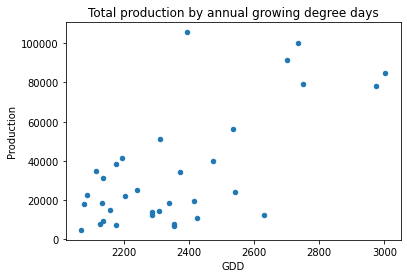

In [76]:
wine_weather_totals.plot.scatter(x="GDD",y="Production",title="Total production by annual growing degree days");

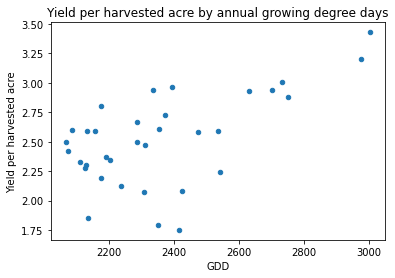

In [77]:
wine_weather_totals.plot.scatter(x="GDD",y="Yield per harvested acre",
                                 title="Yield per harvested acre by annual growing degree days");

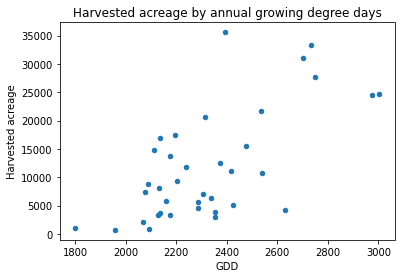

In [78]:
wine_weather_totals.plot.scatter(x="GDD",y="Harvested acreage",
                                title="Harvested acreage by annual growing degree days");

- Looking at the scatter plots, there did seem to be a general correlation between an increase in GDD and increase in all three of the wine grape production measures we were interested in. Next, we decided to look at the relationship among these factors across time, using line graphs.

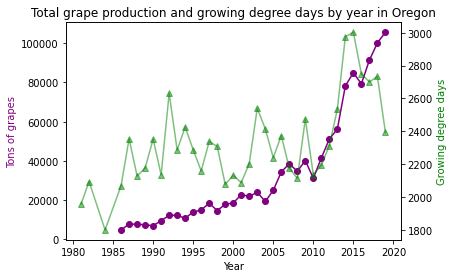

In [79]:
fig,ax = plt.subplots()
ax.plot(wine_weather_totals["Year"], wine_weather_totals["Production"], color = "purple", marker = "o")
ax.set_xlabel("Year")
ax.set_ylabel("Tons of grapes",color="purple")
ax2 = ax.twinx()
ax2.plot(wine_weather_totals["Year"],wine_weather_totals["GDD"],color="green",marker="^",alpha=.5)
ax2.set_ylabel("Growing degree days",color="green")
plt.title("Total grape production and growing degree days by year in Oregon")
plt.show()

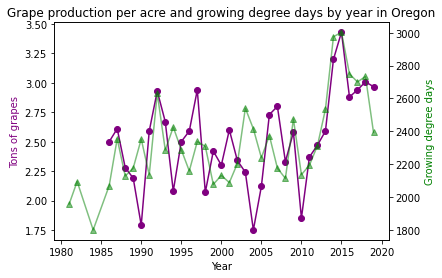

In [80]:
fig,ax = plt.subplots()
ax.plot(wine_weather_totals["Year"], wine_weather_totals["Yield per harvested acre"], color = "purple", marker = "o")
ax.set_xlabel("Year")
ax.set_ylabel("Tons of grapes",color="purple")
ax2 = ax.twinx()
ax2.plot(wine_weather_totals["Year"],wine_weather_totals["GDD"],color="green",marker="^",alpha=.5)
ax2.set_ylabel("Growing degree days",color="green")
plt.title("Grape production per acre and growing degree days by year in Oregon")
plt.show()

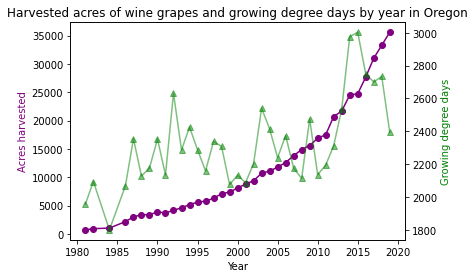

In [81]:
fig,ax = plt.subplots()
ax.plot(wine_weather_totals["Year"], wine_weather_totals["Harvested acreage"], color = "purple", marker = "o")
ax.set_xlabel("Year")
ax.set_ylabel("Acres harvested",color="purple")
ax2 = ax.twinx()
ax2.plot(wine_weather_totals["Year"],wine_weather_totals["GDD"],color="green",marker="^",alpha=.5)
ax2.set_ylabel("Growing degree days",color="green")
plt.title("Harvested acres of wine grapes and growing degree days by year in Oregon")
plt.show()

- Looking at the variables compared across the years, it is evident that total production and total harvested acres are increasing steadily through the years. Growing degree days are also on a general upward trend. Yield per acre has been more consistently variable, so the fact that there still seems to be some correlation with GDD there is perhaps the most convincing evidence that higher temperatures are better for wine grapes in Oregon.

### Q2: Comparing across varietals

Next, we wanted to see whether there was any difference in how GDD impacted different varietals. Some varietals are traditionally thought to grow best in warmer climates, while others are thought to grow best in colder climates. This graphic from Dr. Gregory Jones provides a good overview of the warm and cool climate varietals:

![Image](https://www.guildsomm.com/cfs-file/__key/communityserver-blogs-components-weblogfiles/00-00-00-03-55/Figure-1.jpg)

Riesling and Pinot Noir are two cool climate staple varietals of Oregon's, and Tempranillo and Cabernet Sauvignon are two varietals grown in Oregon that prefer warmer weather. We wanted to see if there was evidence that the different varietals responded differently not only in more subtle ways but in sheer production volume to changes in temperature.

In [82]:
wine_weather_cab = wine_weather[wine_weather["Variety"]=="Cabernet Sauvignon"]
wine_weather_pinot = wine_weather[wine_weather["Variety"]=="Pinot Noir"]
wine_weather_rie = wine_weather[wine_weather["Variety"]=="Riesling"]
wine_weather_temp = wine_weather[wine_weather["Variety"]=="Tempranillo"]

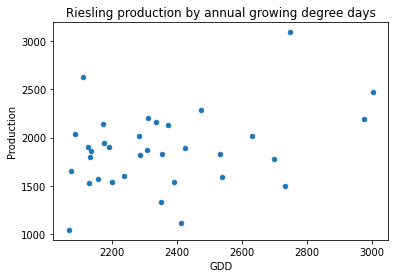

In [83]:
wine_weather_rie.plot.scatter(x="GDD",y="Production",title="Riesling production by annual growing degree days");

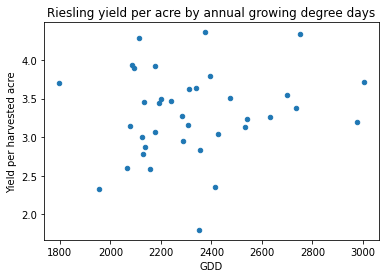

In [84]:
wine_weather_rie.plot.scatter(x="GDD",y="Yield per harvested acre",title="Riesling yield per acre by annual growing degree days");

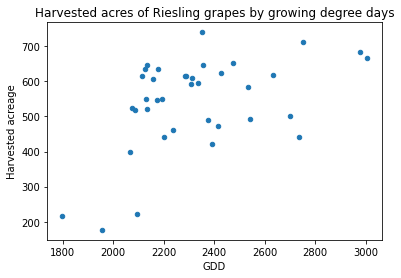

In [85]:
wine_weather_rie.plot.scatter(x="GDD",y="Harvested acreage",title="Harvested acres of Riesling grapes by growing degree days");

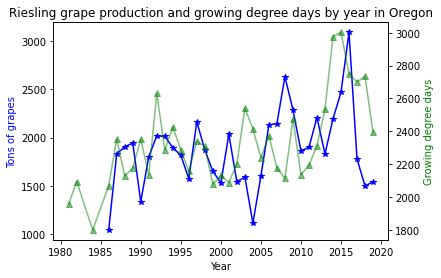

In [86]:
fig,ax = plt.subplots()
ax.plot(wine_weather_rie["Year"], wine_weather_rie["Production"], color = "blue", marker = "*")
ax.set_xlabel("Year")
ax.set_ylabel("Tons of grapes",color="blue")
ax2 = ax.twinx()
ax2.plot(wine_weather_totals["Year"],wine_weather_totals["GDD"],color="green",marker="^",alpha=.5)
ax2.set_ylabel("Growing degree days",color="green")
plt.title("Riesling grape production and growing degree days by year in Oregon")
plt.show()

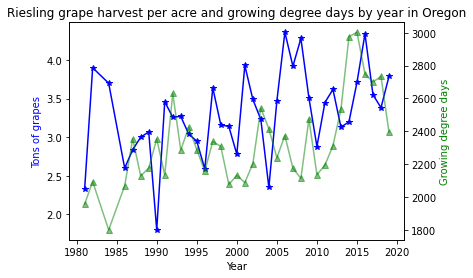

In [87]:
fig,ax = plt.subplots()
ax.plot(wine_weather_rie["Year"], wine_weather_rie["Yield per harvested acre"], color = "blue", marker = "*")
ax.set_xlabel("Year")
ax.set_ylabel("Tons of grapes",color="blue")
ax2 = ax.twinx()
ax2.plot(wine_weather_totals["Year"],wine_weather_totals["GDD"],color="green",marker="^",alpha=.5)
ax2.set_ylabel("Growing degree days",color="green")
plt.title("Riesling grape harvest per acre and growing degree days by year in Oregon")
plt.show()

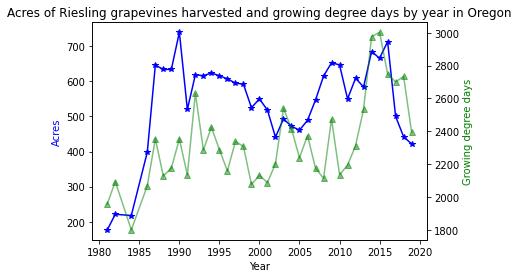

In [88]:
fig,ax = plt.subplots()
ax.plot(wine_weather_rie["Year"], wine_weather_rie["Harvested acreage"], color = "blue", marker = "*")
ax.set_xlabel("Year")
ax.set_ylabel("Acres",color="blue")
ax2 = ax.twinx()
ax2.plot(wine_weather_totals["Year"],wine_weather_totals["GDD"],color="green",marker="^",alpha=.5)
ax2.set_ylabel("Growing degree days",color="green")
plt.title("Acres of Riesling grapevines harvested and growing degree days by year in Oregon")
plt.show()

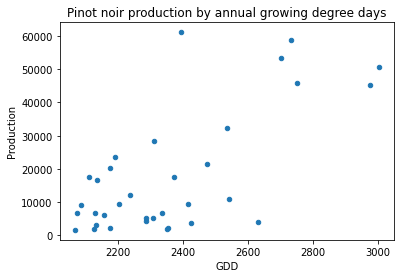

In [89]:
wine_weather_pinot.plot.scatter(x="GDD",y="Production",title="Pinot noir production by annual growing degree days");

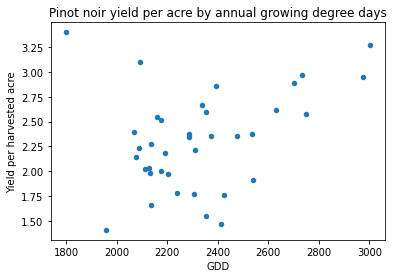

In [90]:
wine_weather_pinot.plot.scatter(x="GDD",y="Yield per harvested acre",title="Pinot noir yield per acre by annual growing degree days");

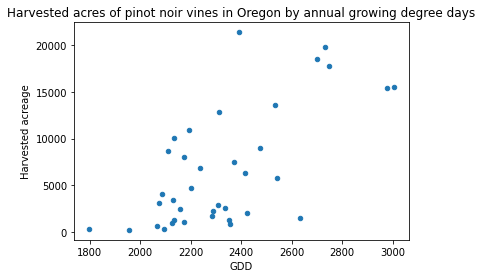

In [91]:
wine_weather_pinot.plot.scatter(x="GDD",y="Harvested acreage",title="Harvested acres of pinot noir vines in Oregon by annual growing degree days");

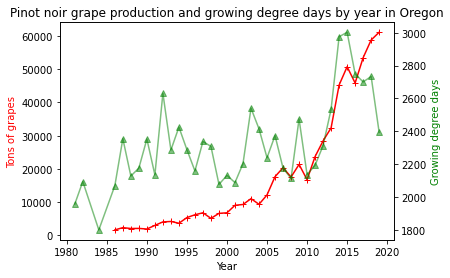

In [92]:
fig,ax = plt.subplots()
ax.plot(wine_weather_pinot["Year"], wine_weather_pinot["Production"], color = "red", marker = "+")
ax.set_xlabel("Year")
ax.set_ylabel("Tons of grapes",color="red")
ax2 = ax.twinx()
ax2.plot(wine_weather_totals["Year"],wine_weather_totals["GDD"],color="green",marker="^",alpha=.5)
ax2.set_ylabel("Growing degree days",color="green")
plt.title("Pinot noir grape production and growing degree days by year in Oregon")
plt.show()

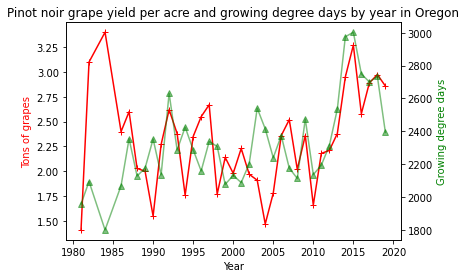

In [93]:
fig,ax = plt.subplots()
ax.plot(wine_weather_pinot["Year"], wine_weather_pinot["Yield per harvested acre"], color = "red", marker = "+")
ax.set_xlabel("Year")
ax.set_ylabel("Tons of grapes",color="red")
ax2 = ax.twinx()
ax2.plot(wine_weather_totals["Year"],wine_weather_totals["GDD"],color="green",marker="^",alpha=.5)
ax2.set_ylabel("Growing degree days",color="green")
plt.title("Pinot noir grape yield per acre and growing degree days by year in Oregon")
plt.show()

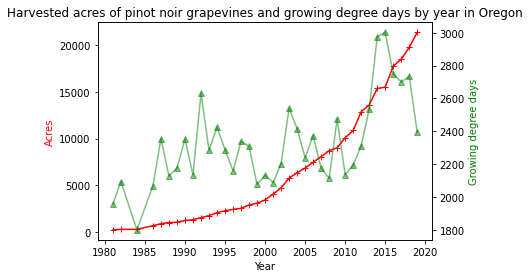

In [94]:
fig,ax = plt.subplots()
ax.plot(wine_weather_pinot["Year"], wine_weather_pinot["Harvested acreage"], color = "red", marker = "+")
ax.set_xlabel("Year")
ax.set_ylabel("Acres",color="red")
ax2 = ax.twinx()
ax2.plot(wine_weather_totals["Year"],wine_weather_totals["GDD"],color="green",marker="^",alpha=.5)
ax2.set_ylabel("Growing degree days",color="green")
plt.title("Harvested acres of pinot noir grapevines and growing degree days by year in Oregon")
plt.show()

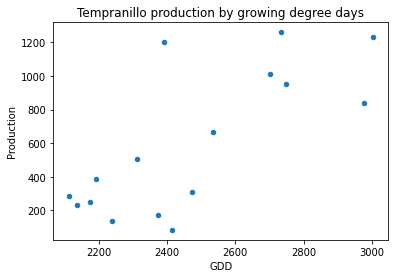

In [95]:
wine_weather_temp.plot.scatter(x="GDD",y="Production",title="Tempranillo production by growing degree days");

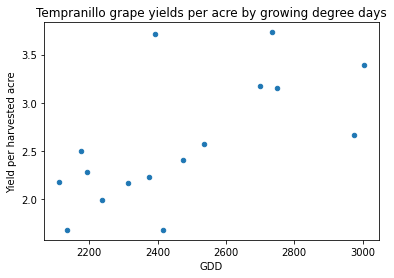

In [96]:
wine_weather_temp.plot.scatter(x="GDD",y="Yield per harvested acre",title="Tempranillo grape yields per acre by growing degree days");

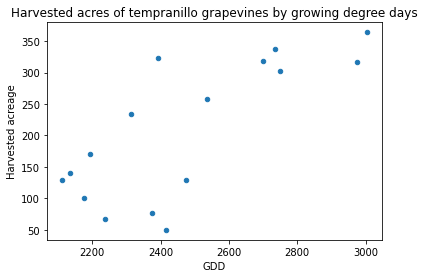

In [97]:
wine_weather_temp.plot.scatter(x="GDD",y="Harvested acreage",title="Harvested acres of tempranillo grapevines by growing degree days");

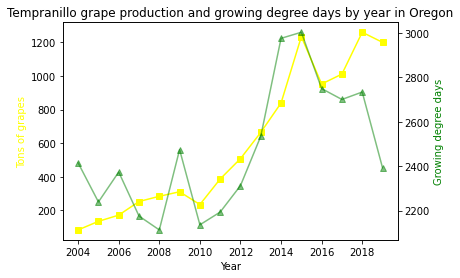

In [98]:
fig,ax = plt.subplots()
ax.plot(wine_weather_temp["Year"], wine_weather_temp["Production"], color = "yellow", marker = "s")
ax.set_xlabel("Year")
ax.set_ylabel("Tons of grapes",color="yellow")
ax2 = ax.twinx()
ax2.plot(wine_weather_temp["Year"],wine_weather_temp["GDD"],color="green",marker="^",alpha=.5)
ax2.set_ylabel("Growing degree days",color="green")
plt.title("Tempranillo grape production and growing degree days by year in Oregon")
plt.show()

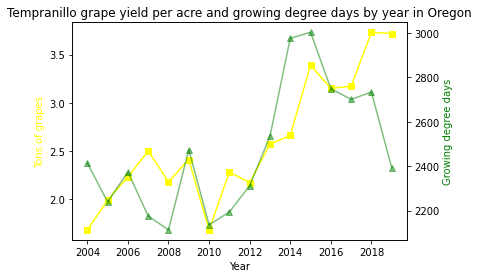

In [99]:
fig,ax = plt.subplots()
ax.plot(wine_weather_temp["Year"], wine_weather_temp["Yield per harvested acre"], color = "yellow", marker = "s")
ax.set_xlabel("Year")
ax.set_ylabel("Tons of grapes",color="yellow")
ax2 = ax.twinx()
ax2.plot(wine_weather_temp["Year"],wine_weather_temp["GDD"],color="green",marker="^",alpha=.5)
ax2.set_ylabel("Growing degree days",color="green")
plt.title("Tempranillo grape yield per acre and growing degree days by year in Oregon")
plt.show()

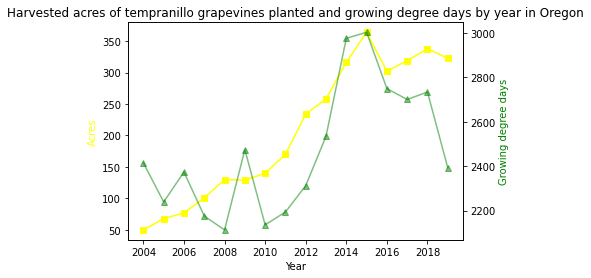

In [100]:
fig,ax = plt.subplots()
ax.plot(wine_weather_temp["Year"], wine_weather_temp["Harvested acreage"], color = "yellow", marker = "s")
ax.set_xlabel("Year")
ax.set_ylabel("Acres",color="yellow")
ax2 = ax.twinx()
ax2.plot(wine_weather_temp["Year"],wine_weather_temp["GDD"],color="green",marker="^",alpha=.5)
ax2.set_ylabel("Growing degree days",color="green")
plt.title("Harvested acres of tempranillo grapevines planted and growing degree days by year in Oregon")
plt.show()

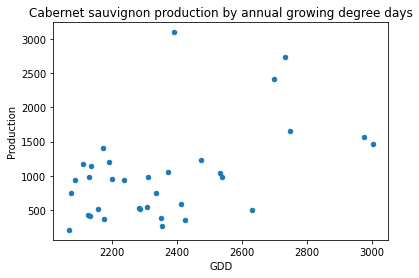

In [101]:
wine_weather_cab.plot.scatter(x="GDD",y="Production",title="Cabernet sauvignon production by annual growing degree days");

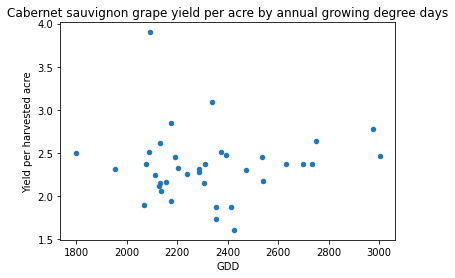

In [102]:
wine_weather_cab.plot.scatter(x="GDD",y="Yield per harvested acre",title="Cabernet sauvignon grape yield per acre by annual growing degree days");

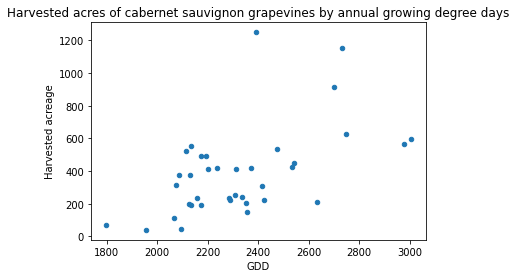

In [103]:
wine_weather_cab.plot.scatter(x="GDD",y="Harvested acreage",title="Harvested acres of cabernet sauvignon grapevines by annual growing degree days");

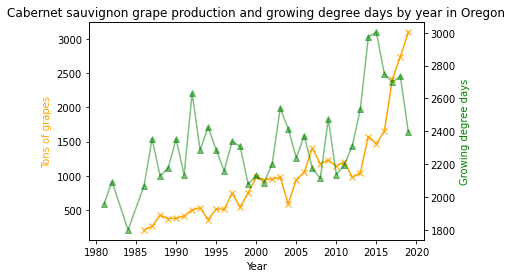

In [104]:
fig,ax = plt.subplots()
ax.plot(wine_weather_cab["Year"], wine_weather_cab["Production"], color = "orange", marker = "x")
ax.set_xlabel("Year")
ax.set_ylabel("Tons of grapes",color="orange")
ax2 = ax.twinx()
ax2.plot(wine_weather_cab["Year"],wine_weather_cab["GDD"],color="green",marker="^",alpha=.5)
ax2.set_ylabel("Growing degree days",color="green")
plt.title("Cabernet sauvignon grape production and growing degree days by year in Oregon")
plt.show()

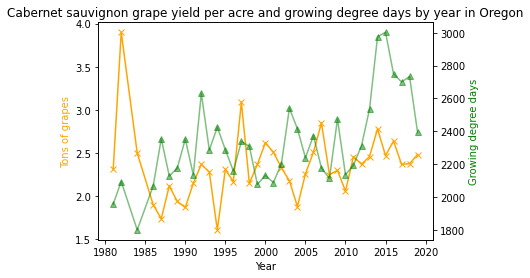

In [105]:
fig,ax = plt.subplots()
ax.plot(wine_weather_cab["Year"], wine_weather_cab["Yield per harvested acre"], color = "orange", marker = "x")
ax.set_xlabel("Year")
ax.set_ylabel("Tons of grapes",color="orange")
ax2 = ax.twinx()
ax2.plot(wine_weather_cab["Year"],wine_weather_cab["GDD"],color="green",marker="^",alpha=.5)
ax2.set_ylabel("Growing degree days",color="green")
plt.title("Cabernet sauvignon grape yield per acre and growing degree days by year in Oregon")
plt.show()

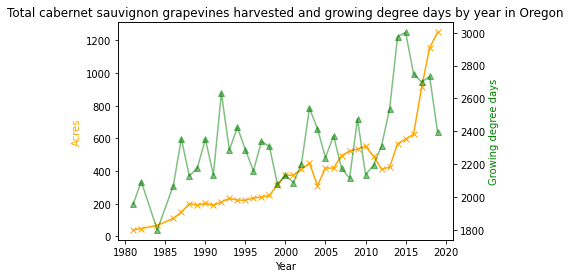

In [106]:
fig,ax = plt.subplots()
ax.plot(wine_weather_cab["Year"], wine_weather_cab["Harvested acreage"], color = "orange", marker = "x")
ax.set_xlabel("Year")
ax.set_ylabel("Acres",color="orange")
ax2 = ax.twinx()
ax2.plot(wine_weather_cab["Year"],wine_weather_cab["GDD"],color="green",marker="^",alpha=.5)
ax2.set_ylabel("Growing degree days",color="green")
plt.title("Total cabernet sauvignon grapevines harvested and growing degree days by year in Oregon")
plt.show()

- Interestingly, the coolest climate varietal we looked at, riesling, did not seem to have production variables that were correlated with the temperature at all. 
- Tempranillo showed the most visible correlation. We also had the least data for this varietal, as it didn't start being widely harvested in Oregon until 2004. This may be related to increasing temperatures, though, as this varietal seems, based on our limited data, to thrive in warmer weather.
- Pinot noir also seemed to have higher production numbers in warmer years.
- Cabernet sauvignon had a weaker upward trend than pinot noir or tempranillo. Yield per acre in particular seems to have very little relation to temperature
- This data does seem to indicate that there is some difference between varietals, and that perhaps traditionally warm weather varietals do grow better during warmer years.

### Question 3: Wildfires

Next, we wanted to see the impact of wildfires, the form of natural disaster that is currently most threatening to Oregon, have historically impacted wine production. Unfortunately, we do not yet have wine data for 2020, when record breaking fires and smoke caused many vineyards to have to throw away fruit or let it rot on the vine. Taking into account the years in which Oregon has experienced its largest fires, we hoped to see what impact wildfires had on wine grape cultivation prior to 2020, and how they might continue to impact wine grape growth and life in Oregon moving forward.

To do so, we used this dataset to find which years had large fires near the wine growing regions of Oregon and compare them to our existing DataFrame.

In [107]:
#Read the file, ensure all numeric values are imported as numeric data types
wildfires = pd.read_csv("files/Oregon Biggest Fires - Sheet1.csv", dtype={"Year":"int64","Latitude":"float64","Longitude":"float64"})
wildfires = wildfires.rename(columns={" Year":"Year"})
wildfires

,Year,Fire name,Acres,Cause,Description,Latitude,Longitude
0,2013,Sunnyside Turnoff,"51,480",Arson,Lands of the Confederated Tribes of Warm Sprin...,44.903662,-121.287829
1,1996,Simnasho fire,"118,000",Engine exhaust,Warms Springs Reservation,44.986262,-121.362980
2,2015,County Line 2 fire,"67,234",Human,The fire started near Warm Springs Reservation,44.830000,-121.377000
3,1996,Ashwood/Donnybrook,"100,590",Human,Burned in Wasco and Jefferson counties. Multip...,44.777000,-120.648000
4,2000,Jackson Fire,"108,000",Human,Wildfire in Malheur county that threatened the...,44.100000,-117.190000
5,1945,3rd Tillamook Burn,"173,000",Human caused,Burned portions of the two earlier Tillamook b...,45.619675,-123.423532
6,1902,Columbia fire,"170,000",Land clearing,Also known as the Yacolt burn. Near Mount Hood,45.365011,-122.294327
7,2006,Foster Gulch Complex,"53,615",Lightning,Baker County,44.974848,-116.863086
8,2012,Barry Point fire,"71,289",Lightning,"The fire burned over 92,977 acres of forest an...",42.111100,-120.801800
9,2012,Cache Creek frie,"73,697",Lightning,The fire burned in the northern Hells Canyon ...,45.986000,-116.928000


In [108]:
wildfires = wildfires[wildfires["Year"]>1980] #Filter out fires that occurred before the time period we are analyzing
wildfires

,Year,Fire name,Acres,Cause,Description,Latitude,Longitude
0,2013,Sunnyside Turnoff,"51,480",Arson,Lands of the Confederated Tribes of Warm Sprin...,44.903662,-121.287829
1,1996,Simnasho fire,"118,000",Engine exhaust,Warms Springs Reservation,44.986262,-121.362980
2,2015,County Line 2 fire,"67,234",Human,The fire started near Warm Springs Reservation,44.830000,-121.377000
3,1996,Ashwood/Donnybrook,"100,590",Human,Burned in Wasco and Jefferson counties. Multip...,44.777000,-120.648000
4,2000,Jackson Fire,"108,000",Human,Wildfire in Malheur county that threatened the...,44.100000,-117.190000
7,2006,Foster Gulch Complex,"53,615",Lightning,Baker County,44.974848,-116.863086
8,2012,Barry Point fire,"71,289",Lightning,"The fire burned over 92,977 acres of forest an...",42.111100,-120.801800
9,2012,Cache Creek frie,"73,697",Lightning,The fire burned in the northern Hells Canyon ...,45.986000,-116.928000
10,2007,Battle Creek Complex,"79,299",Lightning,Wallowa County,45.471661,-116.620696
11,2000,Eastside Complex,"93,451",Lightning,Wallowa-Whitman National Forest.,45.381080,-116.663801


In [109]:
wildfires_wv=wildfires[wildfires["Longitude"]<-121] #Filter out fires that occurred to far east to have an impact
wildfires_wv

,Year,Fire name,Acres,Cause,Description,Latitude,Longitude
0,2013,Sunnyside Turnoff,"51,480",Arson,Lands of the Confederated Tribes of Warm Sprin...,44.903662,-121.287829
1,1996,Simnasho fire,"118,000",Engine exhaust,Warms Springs Reservation,44.986262,-121.362980
2,2015,County Line 2 fire,"67,234",Human,The fire started near Warm Springs Reservation,44.830000,-121.377000
20,2017,Chetco Bar fire,"191,088",Lightning,"The fire burned in the Kalmiopsis Wilderness, ...",42.297000,-123.954000
23,2002,Biscuit fire,"500,000",Lightning,Southern Oregon and northern California. This ...,42.405408,-123.891942
37,2003,B&B Complex fires,"90,769",Lightning,"Began as two separate fires, the Bear Butte Fi...",44.458449,-121.807617
38,1987,Silver Complex fire,"96,540",Lightning,Siskyou National Forest near Grants Pass. The ...,42.460876,-123.825815


In [110]:
#Create a list of years with a fire that may have impacted wine growth
fire_years = wildfires_wv["Year"]
fire_years_list = fire_years.to_list()
fire_years_list

[2013, 1996, 2015, 2017, 2002, 2003, 1987]

In [111]:
#Create a dictionary with each year in our dataset that indicates whether a fire occurred that year or not
fire_dict = {}
for year in range(1981,2019):
    if year in fire_years_list:
        fire_dict.update({year:"fire"})
    else:
        fire_dict.update({year:"no fire"})
fire_dict

{1981: 'no fire',
 1982: 'no fire',
 1983: 'no fire',
 1984: 'no fire',
 1985: 'no fire',
 1986: 'no fire',
 1987: 'fire',
 1988: 'no fire',
 1989: 'no fire',
 1990: 'no fire',
 1991: 'no fire',
 1992: 'no fire',
 1993: 'no fire',
 1994: 'no fire',
 1995: 'no fire',
 1996: 'fire',
 1997: 'no fire',
 1998: 'no fire',
 1999: 'no fire',
 2000: 'no fire',
 2001: 'no fire',
 2002: 'fire',
 2003: 'fire',
 2004: 'no fire',
 2005: 'no fire',
 2006: 'no fire',
 2007: 'no fire',
 2008: 'no fire',
 2009: 'no fire',
 2010: 'no fire',
 2011: 'no fire',
 2012: 'no fire',
 2013: 'fire',
 2014: 'no fire',
 2015: 'fire',
 2016: 'no fire',
 2017: 'fire',
 2018: 'no fire'}

In [112]:
#Make the dictionary into a Series and then a DataFrame
fire_series = pd.Series(fire_dict)
fire_df = fire_series.to_frame()
fire_df = fire_df.rename(columns={0:"Wildfire"})
fire_df

,Wildfire
1981,no fire
1982,no fire
1983,no fire
1984,no fire
1985,no fire
1986,no fire
1987,fire
1988,no fire
1989,no fire
1990,no fire


In [113]:
wine_weather_fire = pd.merge(wine_weather_totals, fire_df, left_on="Year", right_index=True) #Add to the existing DataFrame
wine_weather_fire

,Year,Variety,All planted acreage,Harvested acreage,Yield per harvested acre,Production,GDD,Wildfire
3,1981,Total,1237.5,718.1,NaN,NaN,1956.0,no fire
7,1982,Total,1812.3,942.2,NaN,NaN,2093.5,no fire
11,1984,Total,3361.4,1039.9,NaN,NaN,1798.5,no fire
15,1986,Total,3844.5,2186.1,2.500000,4863.0,2068.0,no fire
19,1987,Total,4457.4,3015.5,2.610000,7860.6,2354.5,fire
23,1988,Total,4967.0,3400.0,2.280000,7750.0,2127.0,no fire
27,1989,Total,5247.0,3400.0,2.190000,7450.0,2175.5,no fire
31,1990,Total,5682.0,3900.0,1.790000,7000.0,2352.5,no fire
35,1991,Total,6050.0,3700.0,2.590000,9600.0,2134.0,no fire
39,1992,Total,5950.0,4200.0,2.930000,12300.0,2631.5,no fire


In [114]:
wine_weather_fire_compared = wine_weather_fire.groupby("Wildfire").mean() #Get the means for every numeric column, sorted by years there were fires and years there were not
wine_weather_fire_compared

,Year,All planted acreage,Harvested acreage,Yield per harvested acre,Production,GDD
Wildfire,,,,,,
fire,2004.714286,17634.628571,15192.357143,2.677143,43056.800000,2499.142857
no fire,1999.310345,12530.300000,10238.872414,2.459559,28940.307692,2281.448276


- Interestingly, this data indicates that more grapes are grown in years with wildfires in or near the Willamette Valley. One factor that could help explain this is that more fires hae occurred in more recent years. That wouldn't account for the difference in yield per harvested acre, though, as that variable has not consistently increased with time.

### Additional Insights and Implications

There does appear to be a general positive relationship between temperature during growing season and wine grape harvests in Oregon. Due to limitations on our time, statistical knowledge, and available data, we can't say much with certainty about the exact nature of that relationship. Further work with this data should begin with some statistical analysis. Further work could also be done on the relationship between other varietals' harvest yields and GDD. Precipitation is another major climate factor that could be incorporated in for a more robust analysis as well.

What we can say with certainty, though, is that wine grape production, growing season temperatures, and severe wildfire frequency are all increasing in Oregon. Somewhat disturbingly, the increasing temperatures that are helping the grapes to thrive right now are also making possible the wildfires that sometimes leave the grapes unusable and may eventually start burning the acres of grapevines faster than new ones can be planted.